## Importing Modules


In [1]:
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import self_utils as su
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, matthews_corrcoef
%matplotlib inline
# Hyper parameter tuning for the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # Import GridSearchCV and StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score # Import f1_score and make_scorer
##ensemble learning
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier



## Importing the dataset


In [ ]:
IS_LOCAL = False
PATH = 'include/your/path/to/data_set.csv'

In [3]:
df = pd.read_csv(PATH)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the discrepencies in the data and performing exploratory data analysis


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
from datetime import datetime

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
len(df)

284807

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking the distribution of data


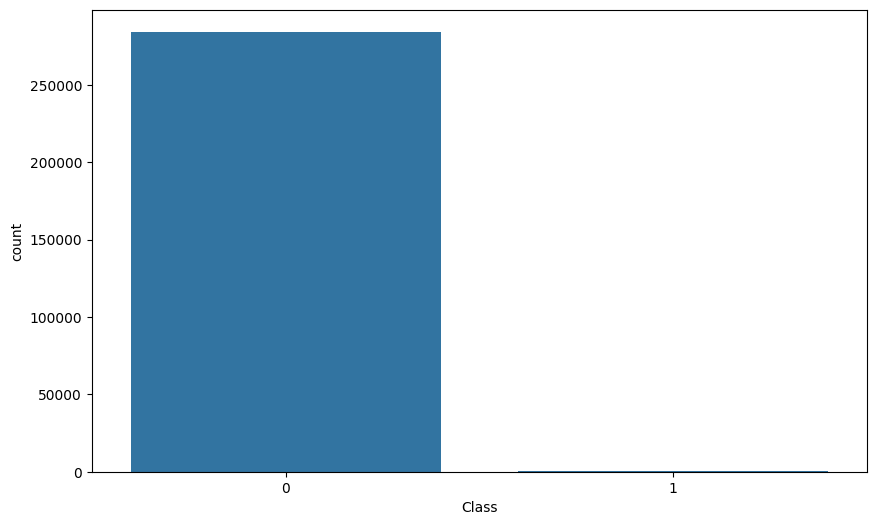

In [10]:
plt.figure(dpi=100, figsize=(10,6))
sns.countplot(data=df, x='Class')
plt.savefig("finalOP/Dataset_Distribution.png")

## Checking the effect of `Amount` and `Time` columns of the dataset on `Class`


### 1. With Amount


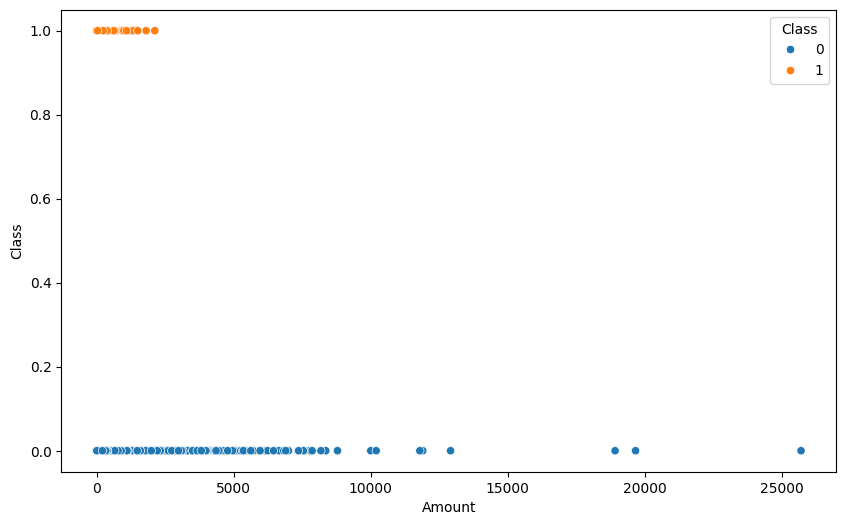

In [11]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Amount', y='Class', hue='Class')
plt.savefig("finalOP/Class_Amount.png")

### 2. With Time


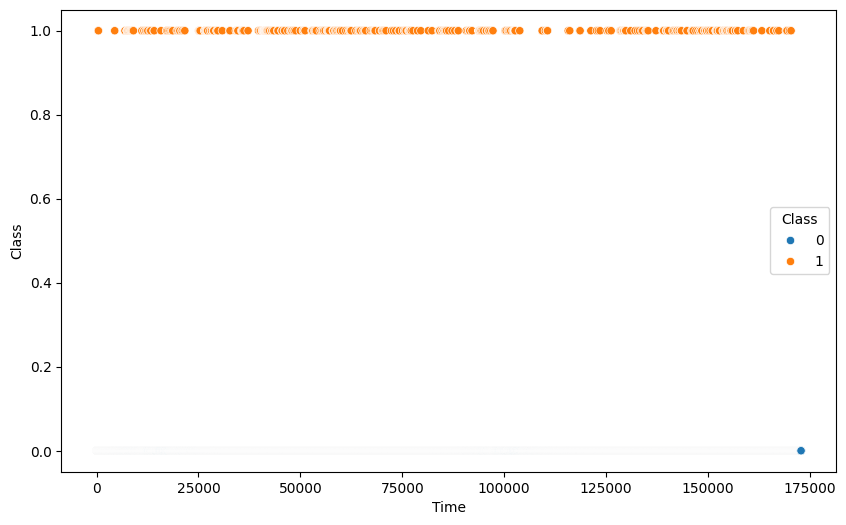

In [12]:
plt.figure(dpi=100, figsize=(10,6))
sns.scatterplot(data=df, x='Time', y='Class', hue='Class', )
plt.savefig("finalOP/Class_Time.png")

## Dropping the non impactful columns


In [13]:
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Scaling `Amount` feature for better results


In [14]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Cleaning the dataset by removing any `NaN` or `infinite` values


In [15]:
print(df)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.01830

## Checking the distribution of different features of the dataset


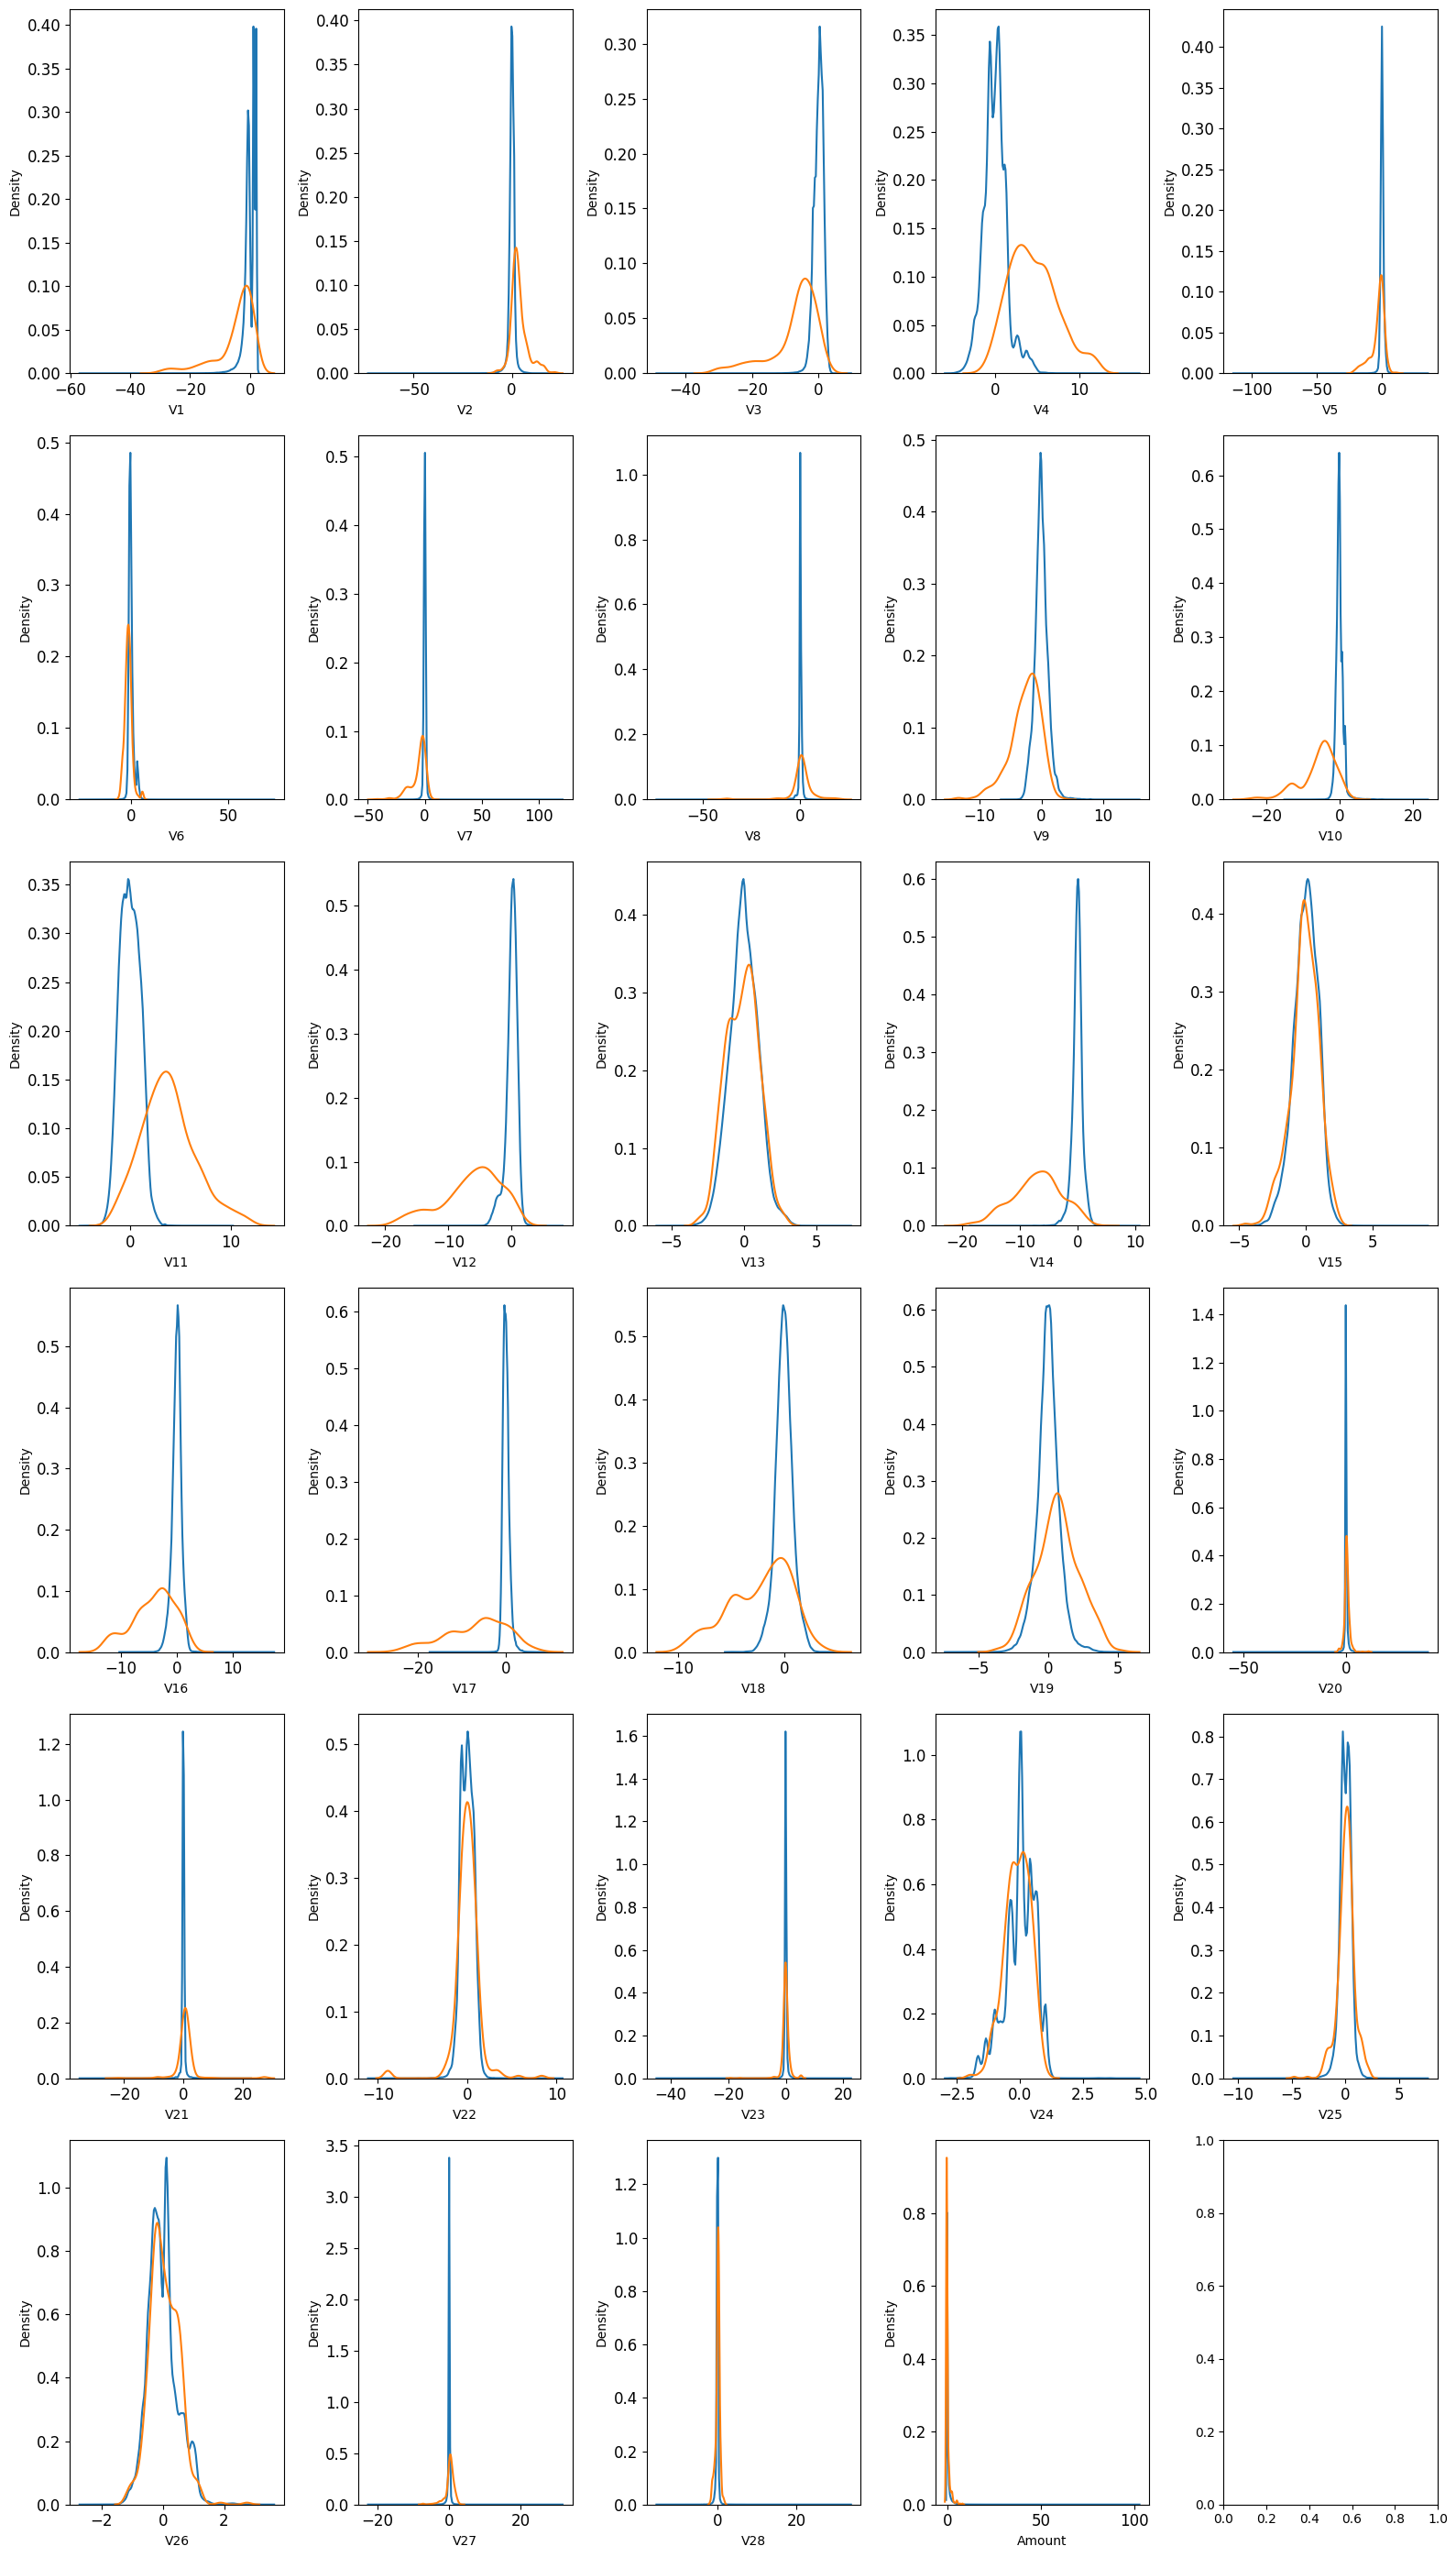

In [16]:
columns = list(df.columns.values)
columns.remove("Class")
n = 1
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

fig, ax = plt.subplots(6, 5, figsize=(16, 28))  # Only one figure creation

for i in columns:
    plt.subplot(6, 5, n)  # Use plt.subplot with correct indexing
    sns.kdeplot(t0[i], label="0")
    sns.kdeplot(t1[i], label="1")
    plt.xlabel(i, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    n = n + 1

plt.tight_layout() # Important: Adjust subplot parameters for a tight layout
plt.show()

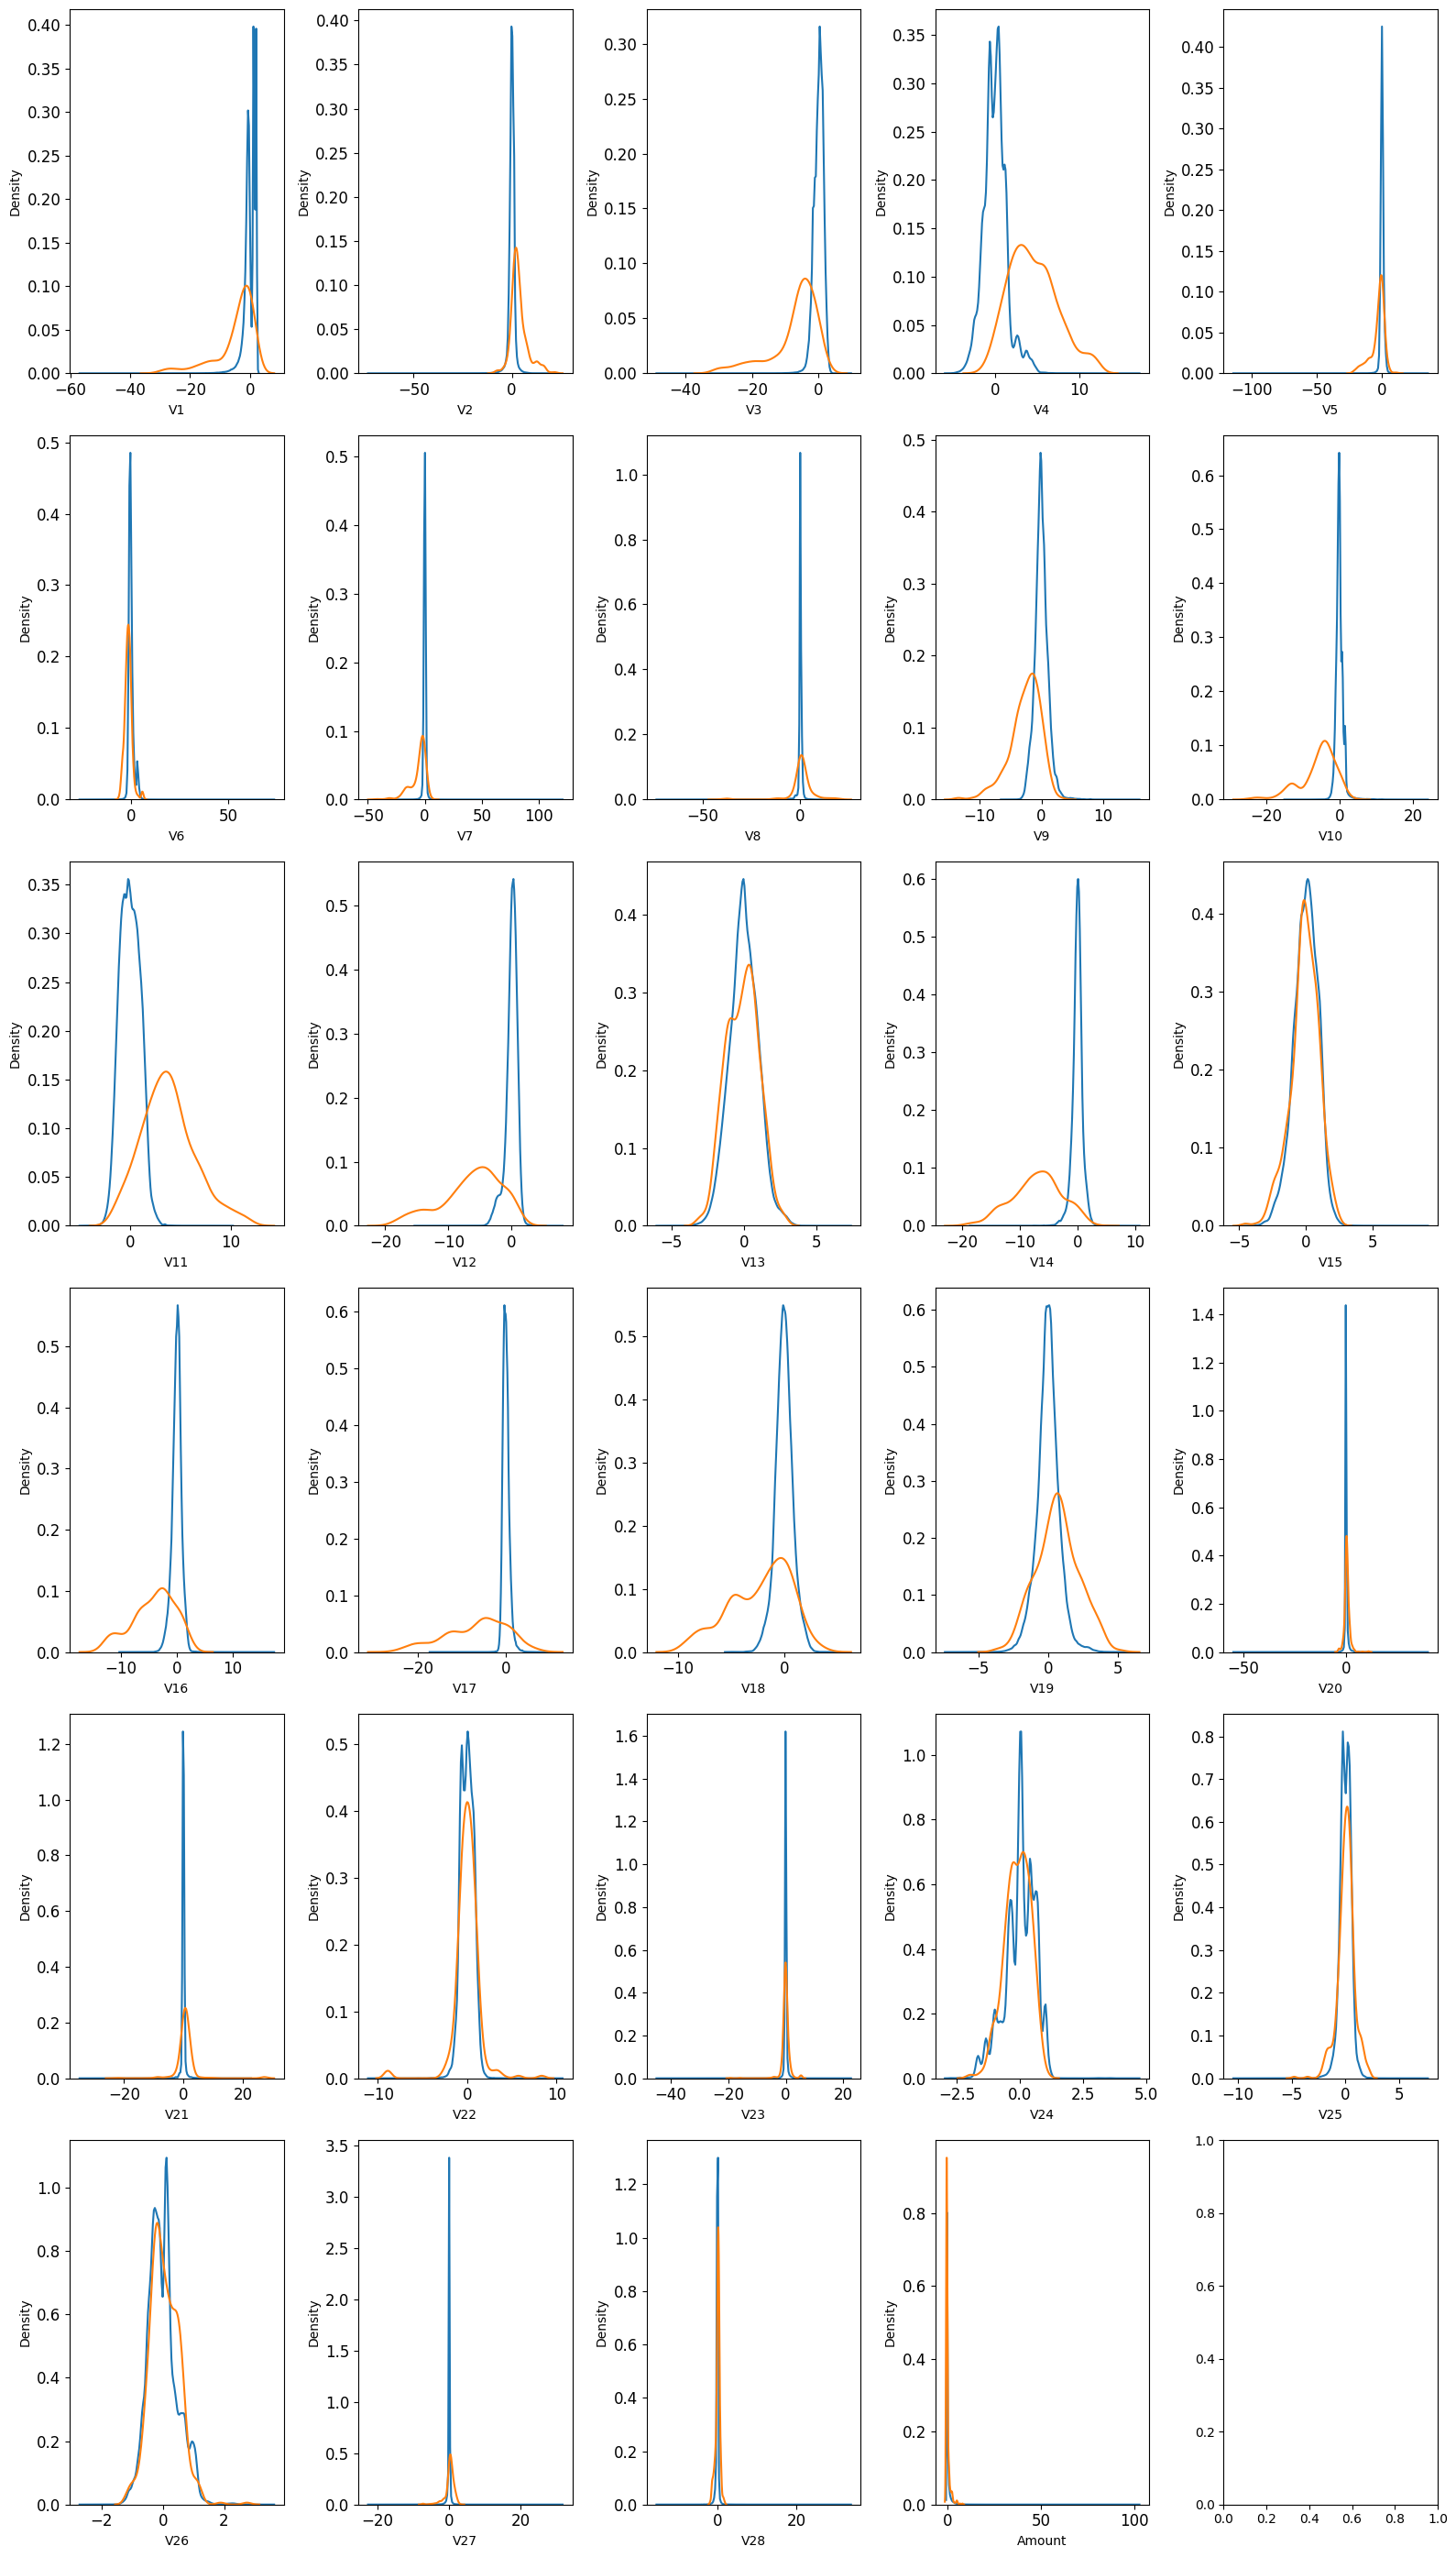

In [17]:
columns = list(df.columns.values)
columns.remove("Class")

fig, axes = plt.subplots(6, 5, figsize=(16, 28))  # Get axes objects

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]  # Get the current axes
    sns.kdeplot(t0[column], label="0", ax=ax)  # Pass the axes to seaborn
    sns.kdeplot(t1[column], label="1", ax=ax)
    ax.set_xlabel(column, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

# Preparing for training the dataset


In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Splitting the data into the training and testing dataset


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.4)
len(X_train)

170884

## Checking skewness and using a transformer to mitigate it


### Before Transformation


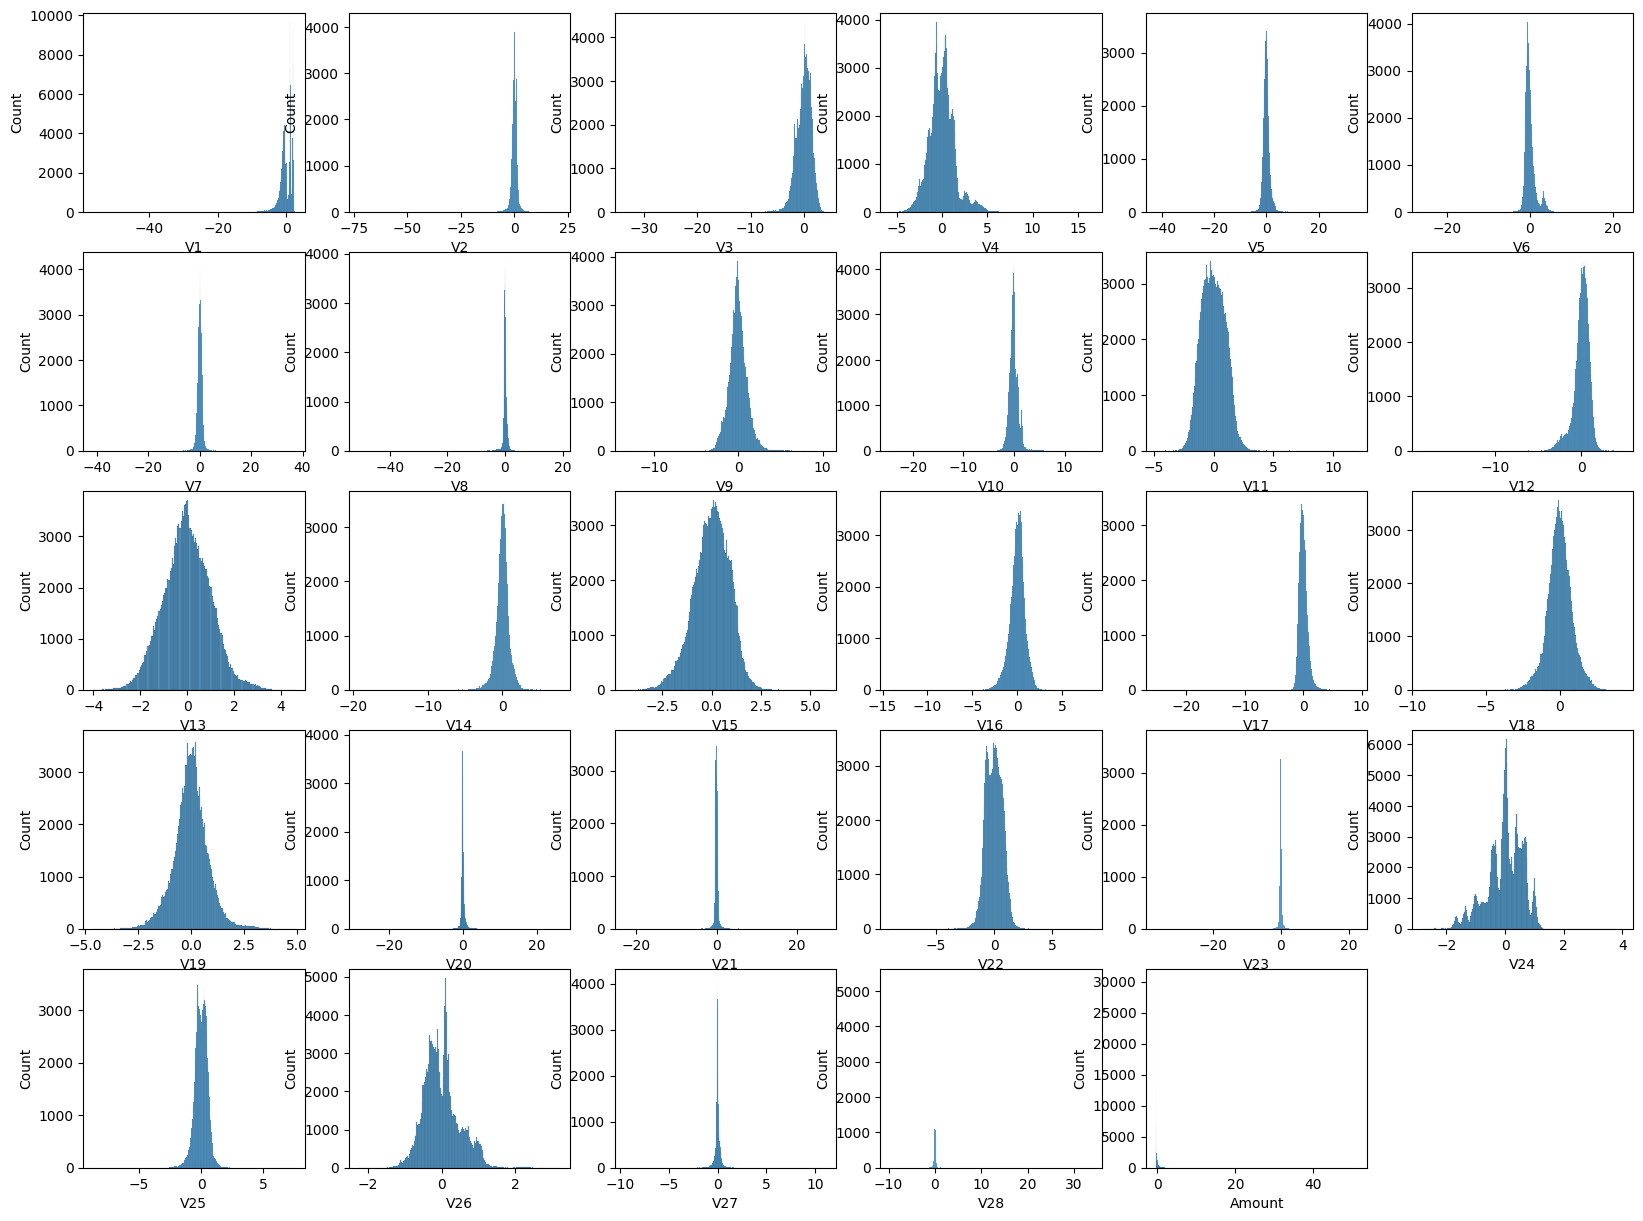

In [20]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

### Applying Transformation


In [21]:
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
X_train[col] = pt.fit_transform(X_train)
X_test[col] = pt.transform(X_test)

### After Transformation


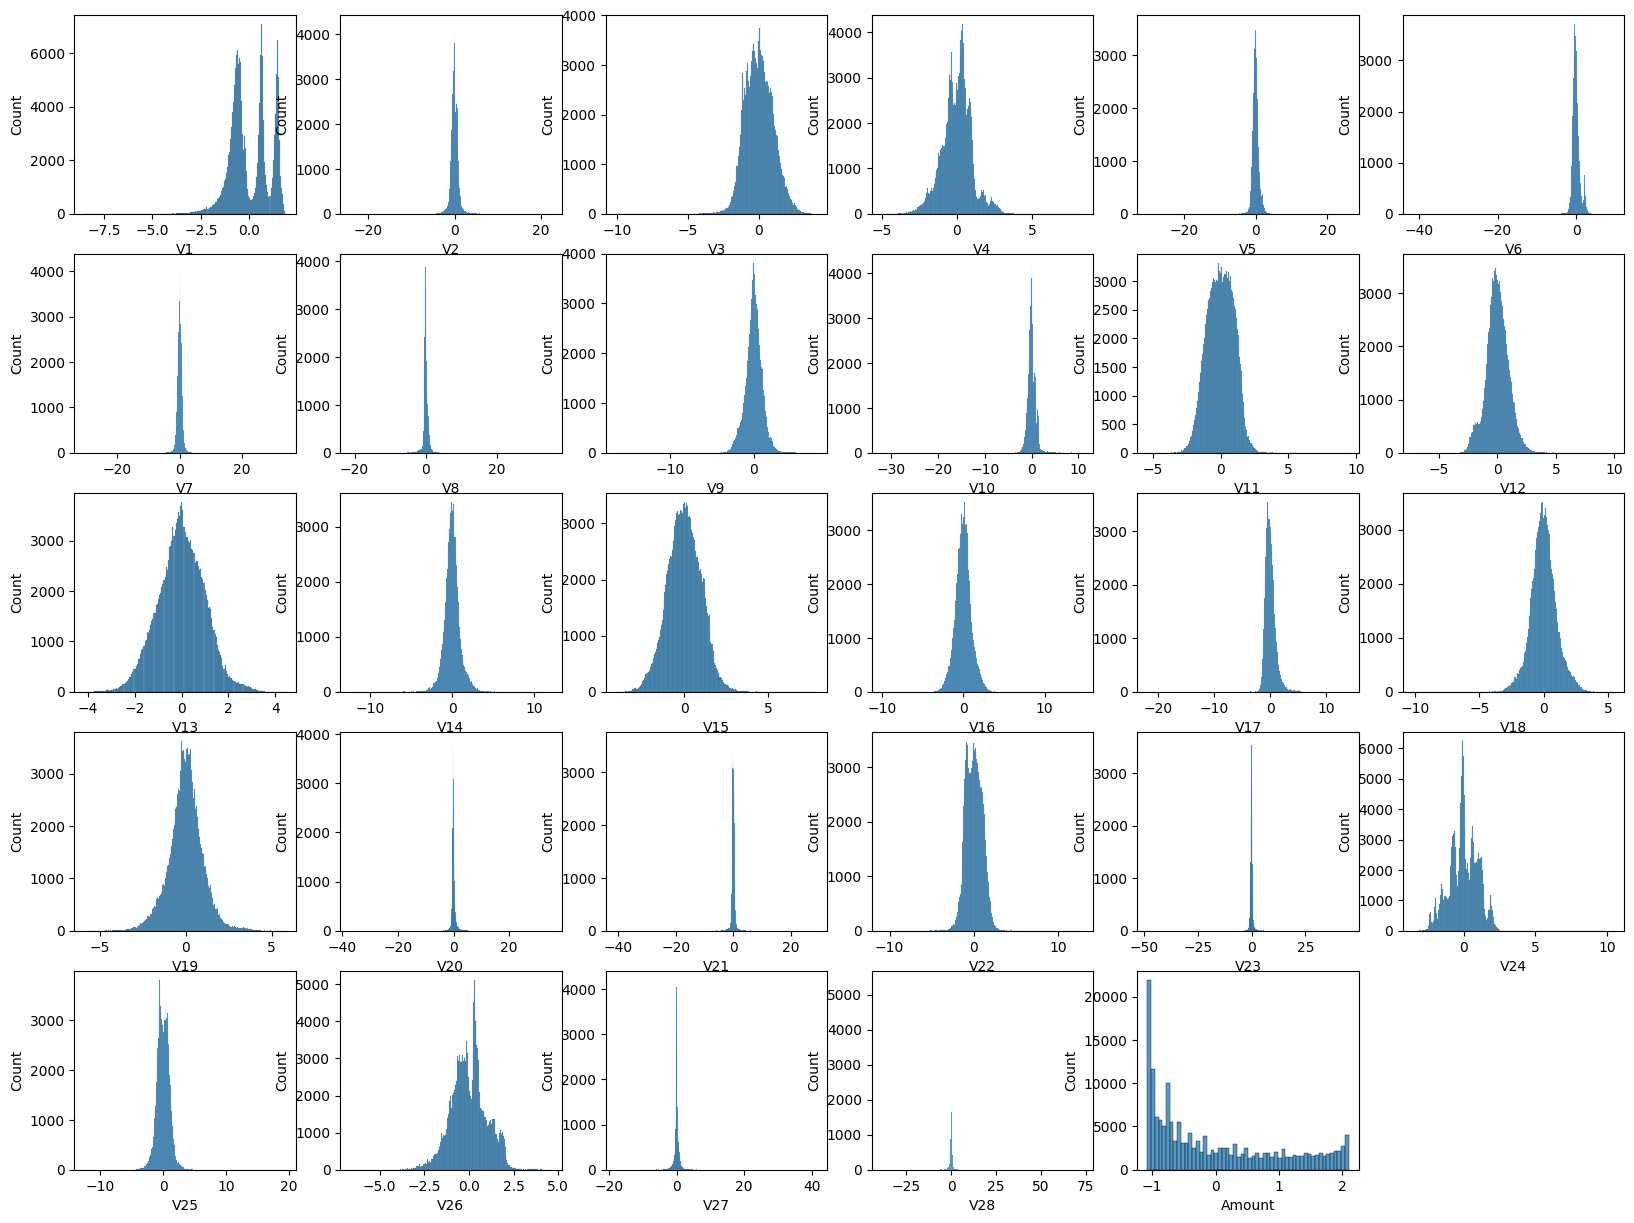

In [22]:
col = X_train.columns
plt.figure(figsize=(20,15))
n=1
for i in col:
    plt.subplot(5,6, n)
    sns.histplot(data = X_train[i])
    n += 1
plt.show()
plt.rcParams.update({'figure.max_open_warning': 0})

## Creating synthetic data using `SMOTE` (Since the dataset is imbalanced)


In [23]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)
print("Before performing smote : ", Counter(y_train))
print("After performing smote : ", Counter(y_train_smote))

Before performing smote :  Counter({0: 170580, 1: 304})
After performing smote :  Counter({0: 170580, 1: 170580})


In [24]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from imblearn.over_sampling import SMOTE

# plt.figure(figsize=(8, 6))
# sns.countplot(x=y)
# plt.title("Class Distribution BEFORE SMOTE")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.savefig("finalOP/class_distribution_before.png")  
# plt.show()

# # 2. Apply SMOTE (only to training data!)
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # 3. Class Distribution AFTER SMOTE
# plt.figure(figsize=(8, 6))
# sns.countplot(x=y_train_smote)
# plt.title("Class Distribution AFTER SMOTE (Training Data)")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.savefig("finalOP/class_distribution_after.png")  # Save figure
# plt.show()

# # 4. Feature Distribution Comparison
# features_to_visualize = ['V15', 'V13', 'V22']  # Replace with your feature names

# for feature in features_to_visualize:
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(X_train[feature], label="Before SMOTE", fill=True)
#     sns.kdeplot(X_train_smote[feature], label="After SMOTE", fill=True)
#     plt.title(f"Distribution of {feature} Before and After SMOTE")
#     plt.xlabel(feature)
#     plt.ylabel("Density")
#     plt.legend()
#     plt.savefig(f"finalOp/feature_distribution_{feature}.png")  # Save figure
#     plt.show()

# # 5. Box plots for feature comparison
# for feature in features_to_visualize:
#     plt.figure(figsize=(10,6))
#     plt.subplot(1,2,1)
#     sns.boxplot(y = X_train[feature])
#     plt.title(f"Before SMOTE for {feature}")
#     plt.subplot(1,2,2)
#     sns.boxplot(y = X_train_smote[feature])
#     plt.title(f"After SMOTE for {feature}")
#     plt.savefig(f"finalOP/box_plot_{feature}.png")  # Save figure
#     plt.show()




# Testing various models on the dataset


## 1. Logistic Regression


### 1.1. Logistic Regression without synthetic data


In [25]:
model_ws_1 = LogisticRegression(solver='saga', max_iter=1000)
model_ws_1.fit(X_train, y_train)
y_pred_ws_1 = model_ws_1.predict(X_test)
acc_ws_1 = accuracy_score(y_test, y_pred_ws_1)
acc_ws_1

0.9992275484318356

#### Confusion Matrix


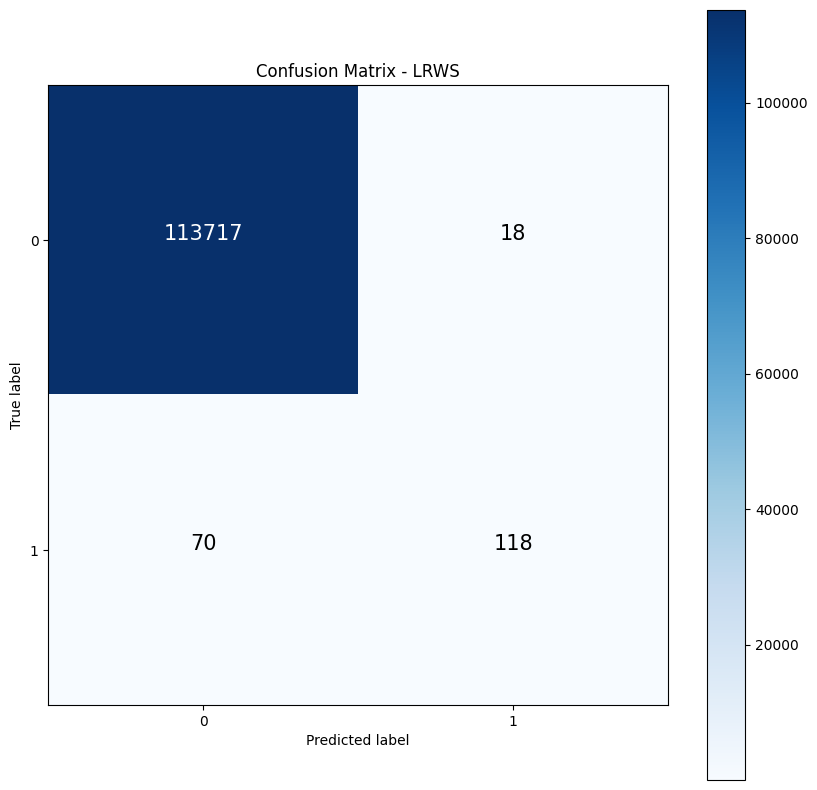

In [26]:
import self_utils as su
su.make_confusion_matrix(y_test, y_pred_ws_1, model_name="LRWS", savefig=True)

### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [27]:
import self_utils as su
res11 = su.calculate_results(y_test, y_pred_ws_1)
res11

{'accuracy': 99.92275484318355,
 'precision': np.float64(0.999167416910136),
 'recall': np.float64(0.9992275484318356),
 'f1': np.float64(0.9991656498492432),
 'mcc': np.float64(0.7376066963755061)}

In [28]:
auc11 = roc_auc_score(y_test, y_pred_ws_1)
auc11

np.float64(0.813750655920023)

### 1.2 Logistic Regression with synthetic data


In [29]:
model_s_1 = LogisticRegression(solver='saga', max_iter=1000)
model_s_1.fit(X_train_smote, y_train_smote)
y_pred_s_1 = model_s_1.predict(X_test)
acc_s_1 = accuracy_score(y_test, y_pred_s_1)
acc_s_1

0.968136372813216

### Confusion Matrix


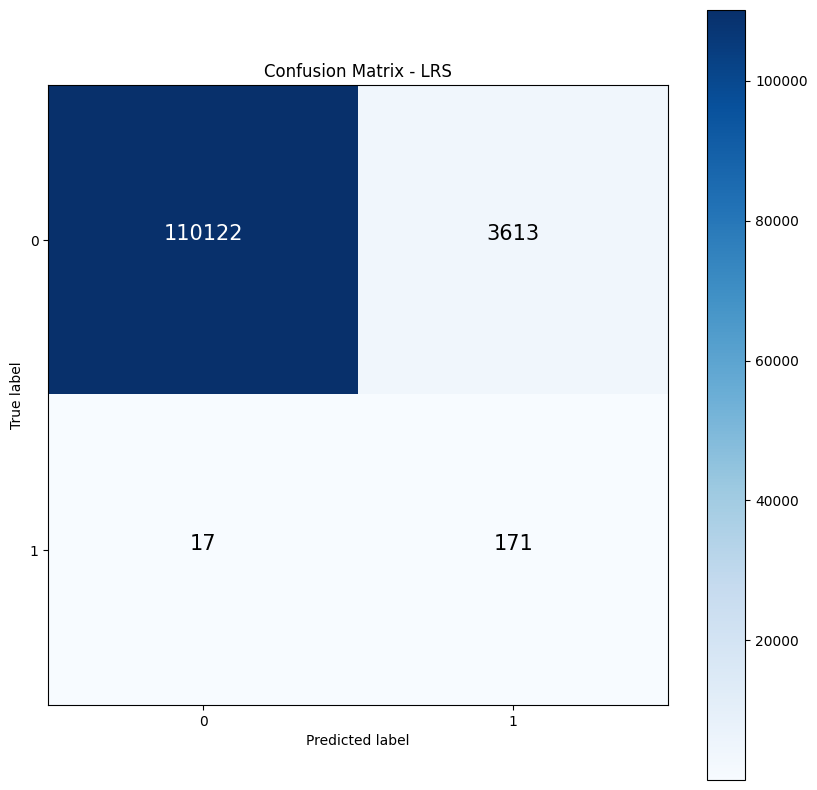

In [30]:
su.make_confusion_matrix(y_test, y_pred_s_1, model_name="LRS", savefig=True)

### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [31]:
res12 = su.calculate_results(y_test, y_pred_s_1)
res12

{'accuracy': 96.81363728132159,
 'precision': np.float64(0.9982702415455135),
 'recall': np.float64(0.968136372813216),
 'f1': np.float64(0.9823041324413676),
 'mcc': np.float64(0.19882876707098954)}

In [32]:
auc12 = roc_auc_score(y_test, y_pred_s_1)
auc12

np.float64(0.9389038208452085)

In [33]:
has_proba = hasattr(model_ws_1, "predict_proba")
print(f"Model has predict_proba: {has_proba}")

Model has predict_proba: True


# 2. Decision Tree Classifier


## 2.1. Decision Tree Classifier without synthetic data


In [34]:
model_ws_2 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_ws_2.fit(X_train, y_train)
y_pred_ws_2 = model_ws_2.predict(X_test)
acc_ws_2 = accuracy_score(y_test, y_pred_ws_2)
acc_ws_2

0.9995172177698972

### Confusion Matrix


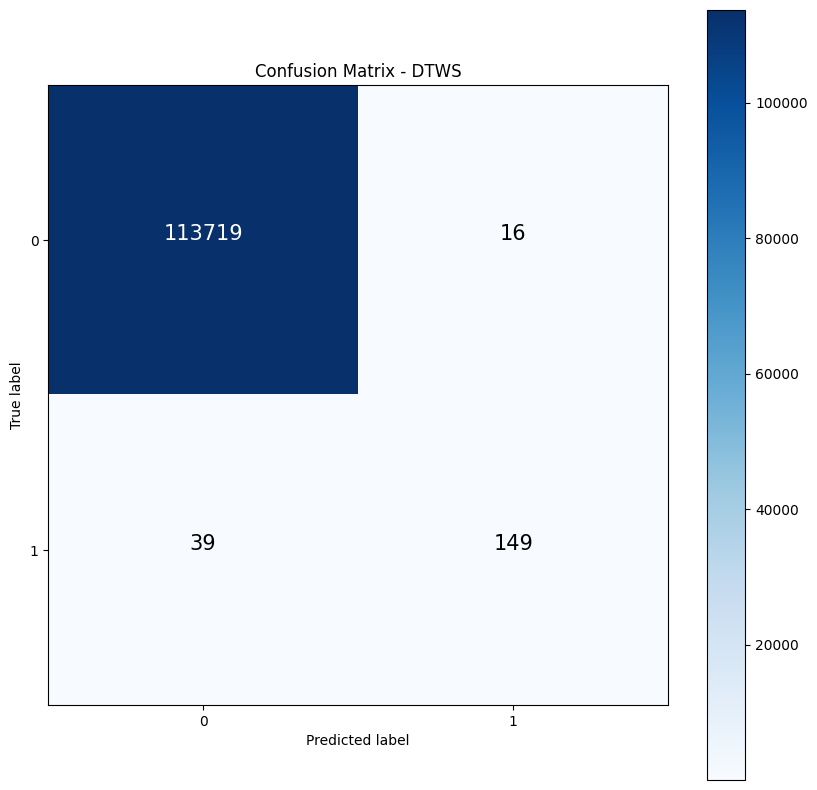

In [35]:
su.make_confusion_matrix(y_test, y_pred_ws_2, model_name="DTWS", savefig=True)

### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [36]:
res21 = su.calculate_results(y_test, y_pred_ws_2)
res21

{'accuracy': 99.95172177698973,
 'precision': np.float64(0.9994977096997921),
 'recall': np.float64(0.9995172177698972),
 'f1': np.float64(0.9995015141420327),
 'mcc': np.float64(0.8457546021718985)}

In [37]:
auc21 = roc_auc_score(y_test, y_pred_ws_2)
auc21

np.float64(0.8962062567988858)

### 2.2 Decision Tree Classifier with Synthetic data


In [38]:
model_s_2 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_s_2.fit(X_train_smote, y_train_smote)
y_pred_s_2 = model_s_2.predict(X_test)
acc_s_2 = accuracy_score(y_test, y_pred_s_2)
acc_s_2

0.9541707995751516

In [39]:
auc22 = roc_auc_score(y_test, y_pred_s_2)
auc22

np.float64(0.9292543136387404)

### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [40]:
res22 = su.calculate_results(y_test, y_pred_s_2)
res22

{'accuracy': 95.41707995751516,
 'precision': np.float64(0.9982364269875402),
 'recall': np.float64(0.9541707995751516),
 'f1': np.float64(0.9750015540880494),
 'mcc': np.float64(0.16437937325358515)}

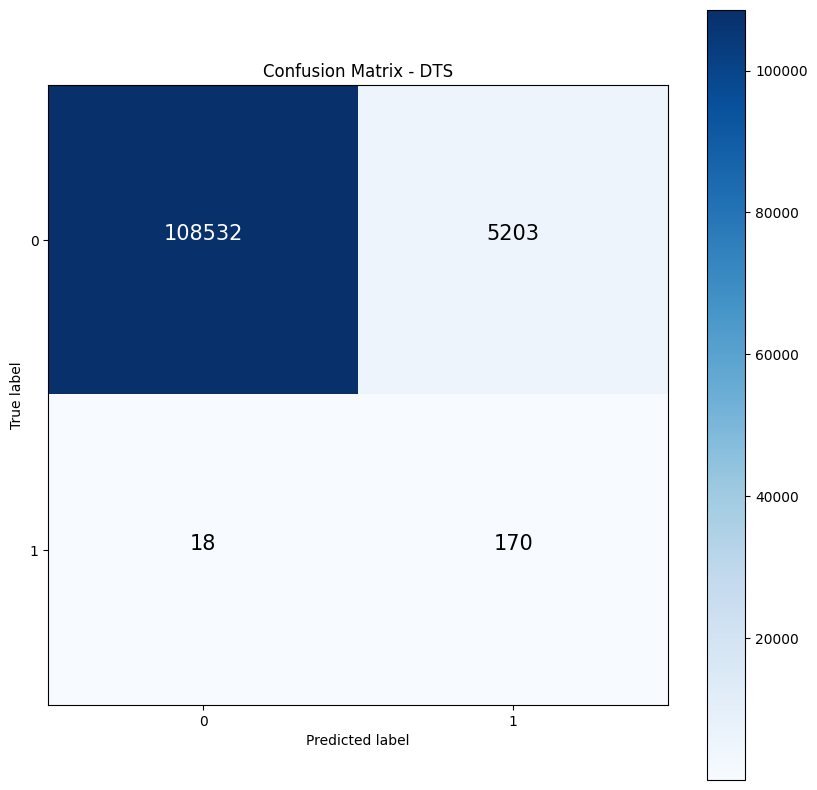

In [41]:
su.make_confusion_matrix(y_test, y_pred_s_2, model_name="DTS", savefig=True)

# 3. Naive Bayes Classifier


## 3.1 Without synthetic data


In [42]:
model_ws_3 = GaussianNB()
model_ws_3.fit(X_train, y_train)
y_pred_ws_3 = model_ws_3.predict(X_test)
acc_ws_3 = accuracy_score(y_test, y_pred_ws_3)
acc_ws_3

0.9776340159581471

### Confusin Matrix


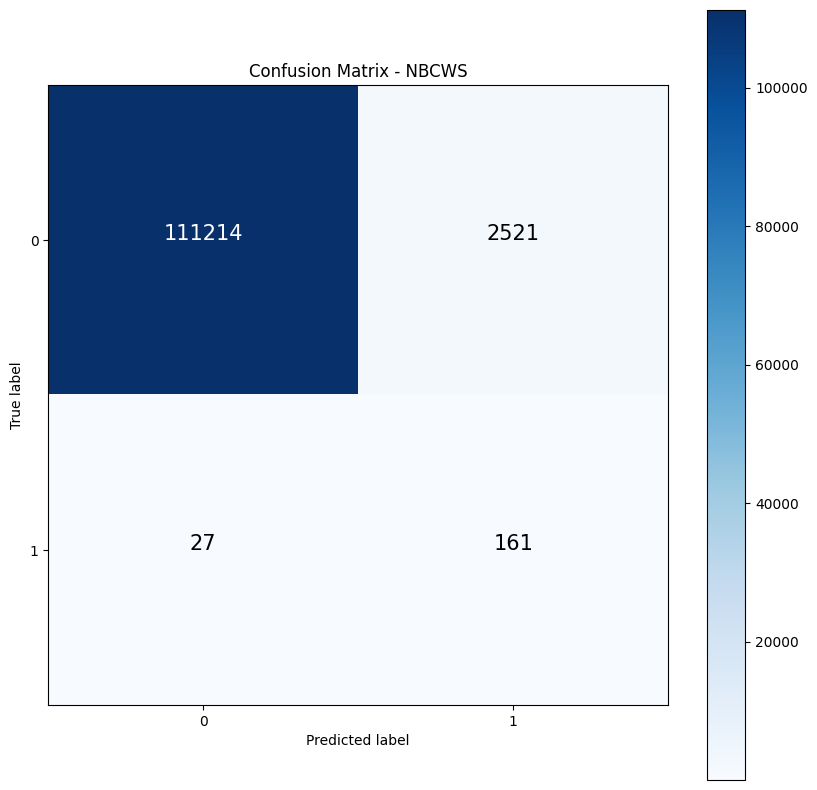

In [43]:
su.make_confusion_matrix(y_test, y_pred_ws_3, model_name="NBCWS", savefig=True)

### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [44]:
res31 = su.calculate_results(y_test, y_pred_ws_3)
res31

{'accuracy': 97.76340159581471,
 'precision': np.float64(0.9982065103042518),
 'recall': np.float64(0.9776340159581471),
 'f1': np.float64(0.9872279486516491),
 'mcc': np.float64(0.22332812275395061)}

In [45]:
auc31 = roc_auc_score(y_test, y_pred_ws_3)
auc31

np.float64(0.9171087092148695)

## 3.2 Naiva Bayes Classifier with synthetic data


In [46]:
model_s_3 = GaussianNB()
model_s_3.fit(X_train_smote, y_train_smote)
y_pred_s_3 = model_s_3.predict(X_test)
acc_s_3 = accuracy_score(y_test, y_pred_s_3)
acc_s_3

0.9738683145633454

## Confusion Mtrix


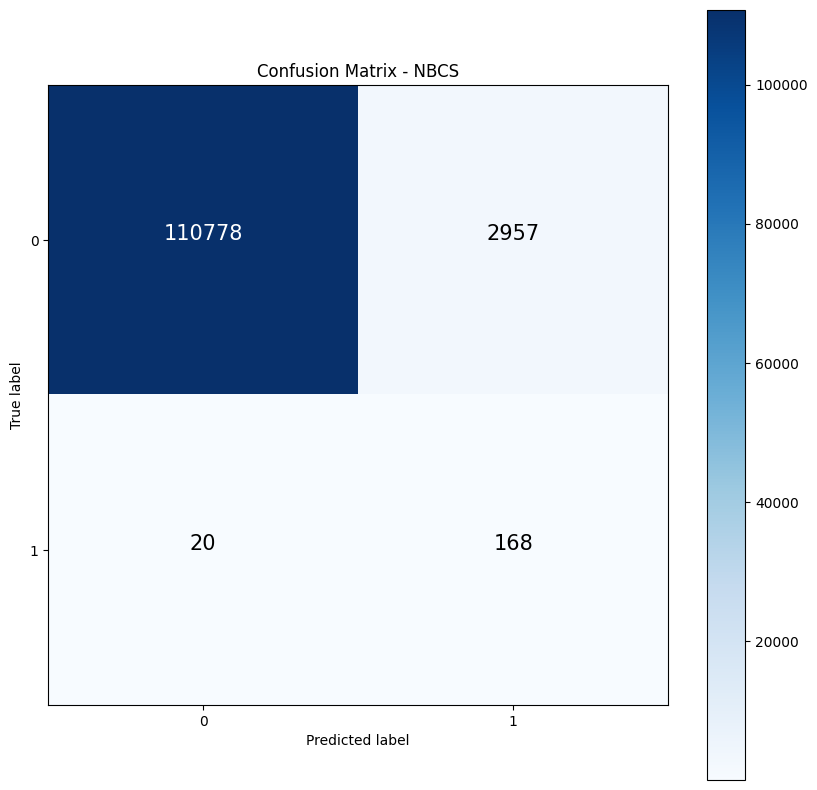

In [47]:
su.make_confusion_matrix(y_test, y_pred_s_3, model_name="NBCS", savefig=True)

### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [48]:
res32 = su.calculate_results(y_test, y_pred_s_3)
res32

{'accuracy': 97.38683145633455,
 'precision': np.float64(0.9982582685324833),
 'recall': np.float64(0.9738683145633454),
 'f1': np.float64(0.9852803771719457),
 'mcc': np.float64(0.21560735257924654)}

In [49]:
auc32 = roc_auc_score(y_test, y_pred_s_3)
auc32

np.float64(0.9338089942185502)

# 4. KNN


## 4.1 Without the synthetic data


In [50]:
model_ws_4 = KNeighborsClassifier(n_neighbors=3)
model_ws_4.fit(X_train, y_train)
y_pred_ws_4 = model_ws_4.predict(X_test)
acc_ws_4 = accuracy_score(y_test, y_pred_ws_4)
acc_ws_4

0.9996488856508343

### Hypeparameter tuning using Croos validation to find the best value for "N"


In [51]:

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  
#     ('knn', KNeighborsClassifier())
# ])


# param_grid = {
#     'knn__n_neighbors': range(1, 21)  
# }


# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 


# f1_scorer = make_scorer(f1_score, average='weighted')

# grid_search = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=cv, 
#     scoring=f1_scorer, 
#     n_jobs=-1,  
#     verbose=1  
# )


# grid_search.fit(X_train, y_train)


# best_n_neighbors = grid_search.best_params_['knn__n_neighbors']
# best_f1_score = grid_search.best_score_

# print(f"Best n_neighbors: {best_n_neighbors}")
# print(f"Best F1-score: {best_f1_score}")



# y_pred = best_knn_model.predict(X_test)
# y_prob = best_knn_model.predict_proba(X_test)[:, 1]


# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_prob)
# mcc = matthews_corrcoef(y_test, y_pred)

# print(f"Accuracy on Test Set: {accuracy}")
# print(f"AUC on Test Set: {auc}")
# print(f"MCC on Test Set: {mcc}")

### Confusion Matrix


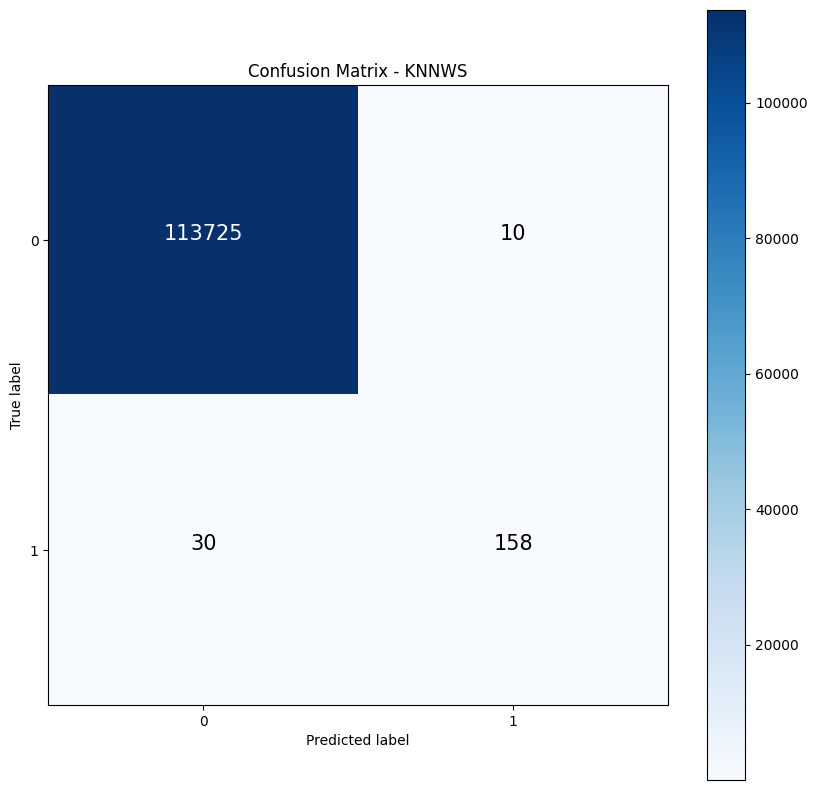

In [52]:
su.make_confusion_matrix(y_test, y_pred_ws_4, model_name="KNNWS", savefig=True )

### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [53]:
res41 = su.calculate_results(y_test, y_pred_ws_4)
res41

{'accuracy': 99.96488856508343,
 'precision': np.float64(0.9996384821177722),
 'recall': np.float64(0.9996488856508343),
 'f1': np.float64(0.9996390383224936),
 'mcc': np.float64(0.8888733851032349)}

In [54]:
auc41 = roc_auc_score(y_test, y_pred_ws_4)
auc41

np.float64(0.9201688041163248)

### 4.2. K Nearest Neighbors Classifier with synthetic data


In [55]:
model_s_4 = KNeighborsClassifier(n_neighbors=3)
model_s_4.fit(X_train_smote, y_train_smote)
y_pred_s_4 = model_s_4.predict(X_test)
acc_s_4 = accuracy_score(y_test, y_pred_s_4)
acc_s_4

0.9982883175478174

### Confusin Matrix


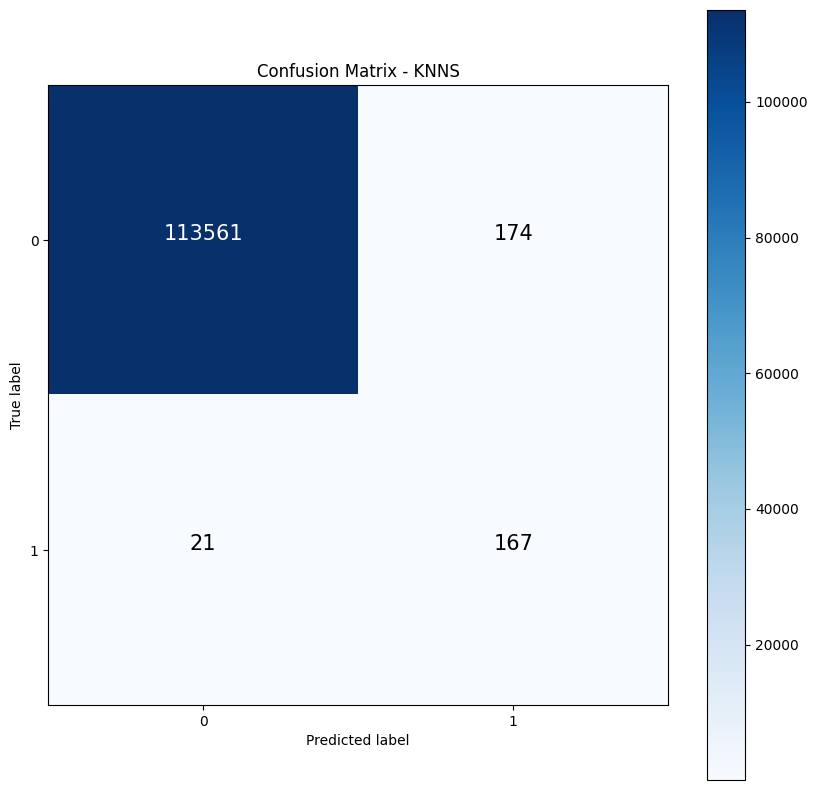

In [56]:
su.make_confusion_matrix(y_test, y_pred_s_4, model_name="KNNS", savefig=True)

#### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [57]:
res42 = su.calculate_results(y_test, y_pred_s_4)
res42

{'accuracy': 99.82883175478175,
 'precision': np.float64(0.9989733600177202),
 'recall': np.float64(0.9982883175478174),
 'f1': np.float64(0.9985352721458867),
 'mcc': np.float64(0.6588765609961462)}

In [58]:
auc42 = roc_auc_score(y_test, y_pred_s_4)
auc42

np.float64(0.9433840001346916)

# 5. Random Forest Classifier


## 5.1. Random Forest Classifier without synthetic data


In [59]:
model_ws_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_ws_5.fit(X_train, y_train)
y_pred_ws_5 = model_ws_5.predict(X_test)
acc_ws_5 = accuracy_score(y_test, y_pred_ws_5)
acc_ws_5

0.9995698849222721

### Confusin Matrix


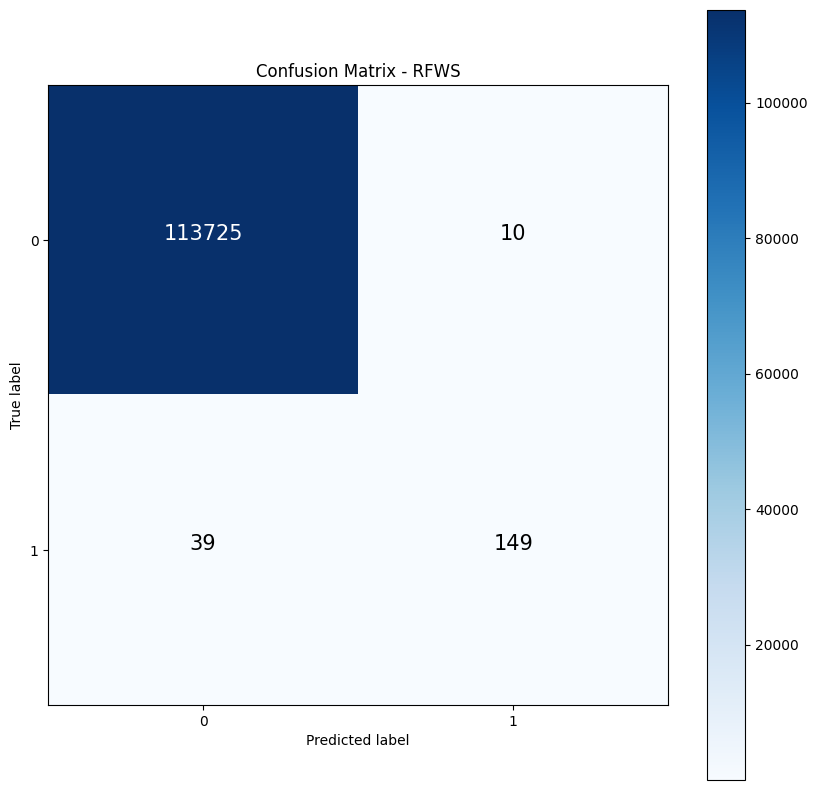

In [60]:
su.make_confusion_matrix(y_test, y_pred_ws_5, model_name="RFWS", savefig=True)

#### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [61]:
res51 = su.calculate_results(y_test, y_pred_ws_5)
res51

{'accuracy': 99.95698849222721,
 'precision': np.float64(0.9995539622575116),
 'recall': np.float64(0.9995698849222721),
 'f1': np.float64(0.9995519392278853),
 'mcc': np.float64(0.8615991039832913)}

In [62]:
auc51 = roc_auc_score(y_test, y_pred_ws_5)
auc51

np.float64(0.8962326339035589)

## 5.2. Random Forest Classifier with synthetic data


In [63]:
model_s_5 = RandomForestClassifier(max_depth=5, criterion='entropy')
model_s_5.fit(X_train_smote, y_train_smote)
y_pred_s_5 = model_s_5.predict(X_test)
acc_s_5 = accuracy_score(y_test, y_pred_s_5)
acc_s_5

0.9935570516928101

### Confusin Matrix


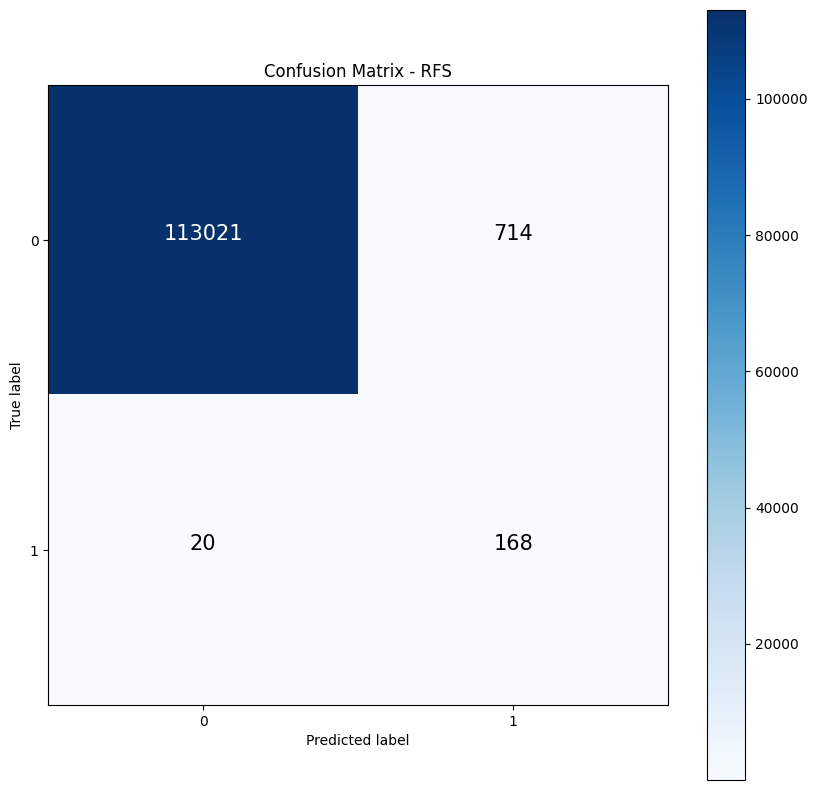

In [64]:
su.make_confusion_matrix(y_test, y_pred_s_5, model_name="RFS", savefig=True)

#### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [65]:
res52 = su.calculate_results(y_test, y_pred_s_5)
res52

{'accuracy': 99.35570516928101,
 'precision': np.float64(0.9984874585158595),
 'recall': np.float64(0.9935570516928101),
 'f1': np.float64(0.9956366351668645),
 'mcc': np.float64(0.4109257957869604)}

In [66]:
auc52 = roc_auc_score(y_test, y_pred_s_5)
auc52

np.float64(0.9436696351821937)

# 6. SVM


## 6.1 Without synthetic data


In [67]:
model_ws_6 = SVC()
model_ws_6.fit(X_train, y_train)
y_pred_ws_6 = model_ws_6.predict(X_test)
acc_ws_6 = accuracy_score(y_test, y_pred_ws_6)
acc_ws_6

0.9994645506175224

### Confusin Matrix


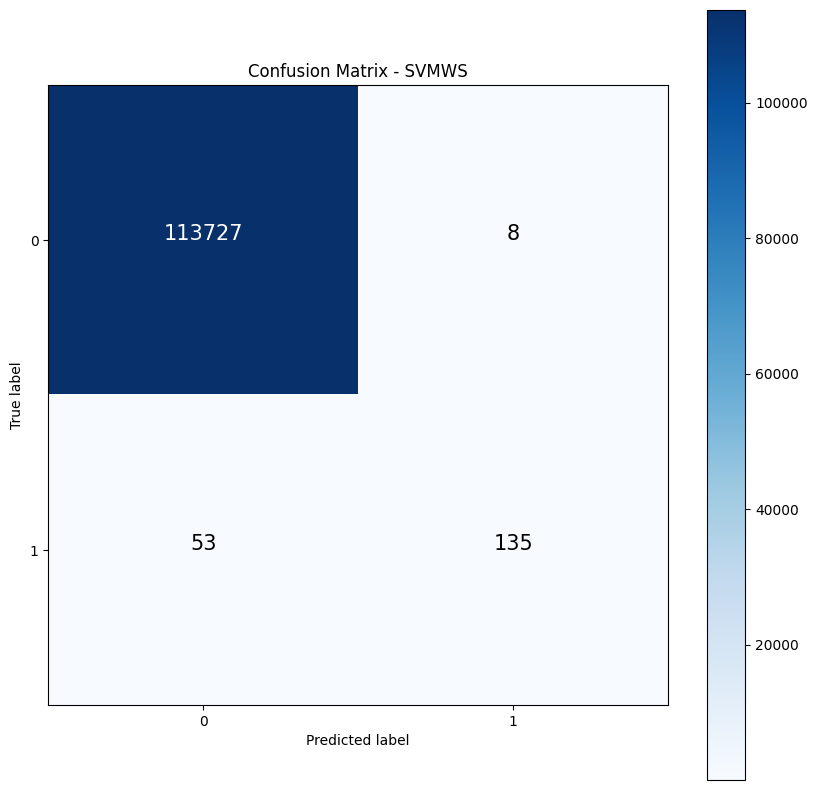

In [68]:
su.make_confusion_matrix(y_test, y_pred_ws_6, model_name="SVMWS", savefig=True)

#### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [69]:
res61 = su.calculate_results(y_test, y_pred_ws_6)
res61

{'accuracy': 99.94645506175223,
 'precision': np.float64(0.9994426365087574),
 'recall': np.float64(0.9994645506175224),
 'f1': np.float64(0.9994282059539296),
 'mcc': np.float64(0.8231109583695755)}

In [70]:
auc61 = roc_auc_score(y_test, y_pred_ws_6)
auc61

np.float64(0.8590073837185919)

## 6.2 With synthetic data


In [71]:
model_s_6 = SVC()
model_s_6.fit(X_train_smote, y_train_smote)
y_pred_s_6 = model_s_6.predict(X_test)
acc_s_6 = accuracy_score(y_test, y_pred_s_6)
acc_s_6

0.9836117377526926

### Confusion Mtrix


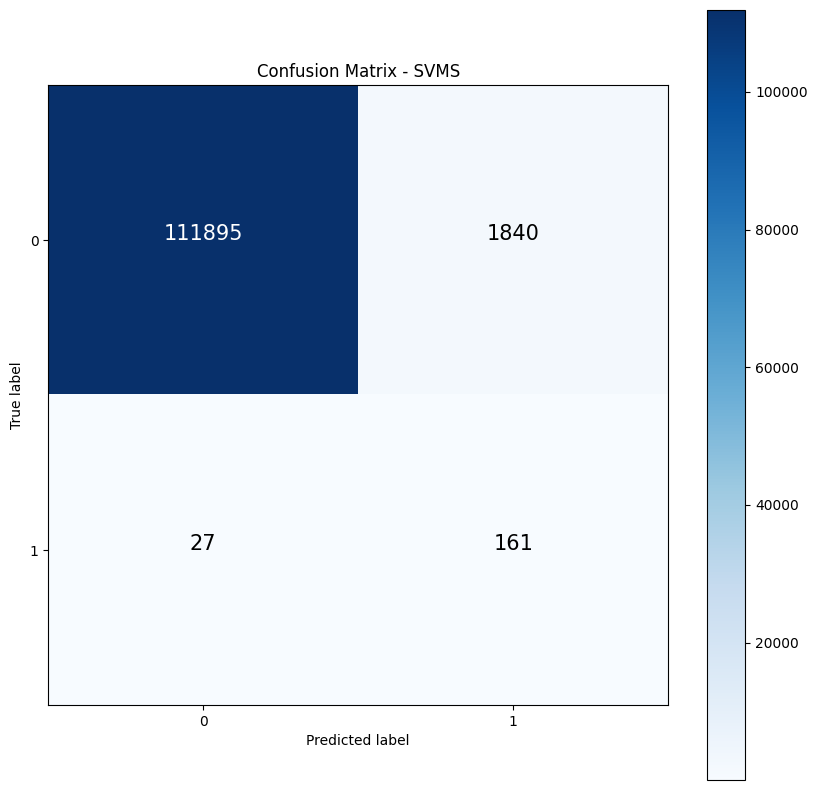

In [72]:
su.make_confusion_matrix(y_test, y_pred_s_6, model_name="SVMS", savefig=True)

#### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [73]:
res62 = su.calculate_results(y_test, y_pred_s_6)
res62

{'accuracy': 98.36117377526926,
 'precision': np.float64(0.9982416989518067),
 'recall': np.float64(0.9836117377526926),
 'f1': np.float64(0.990332545678822),
 'mcc': np.float64(0.25961512334636083)}

In [74]:
auc62 = roc_auc_score(y_test, y_pred_s_6)
auc62

np.float64(0.9201025105952714)

# 7. XGBoost


### 7.1. XGBoost Classifier without synthetic data


In [75]:
model_ws_7 = XGBClassifier()
model_ws_7.fit(X_train, y_train)
y_pred_ws_7 = model_ws_7.predict(X_test)
acc_ws_7 = accuracy_score(y_test, y_pred_ws_7)
acc_ws_7

0.9996049963571886

## TODO: utilize hyperparameter tuning


In [76]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import make_scorer, f1_score


# xgb_model = XGBClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],  # Try different numbers of trees
#     'max_depth': [3, 5, 7],  # Try different tree depths
#     'learning_rate': [0.01, 0.1, 0.3], # Try different learning rates
#     'gamma': [0, 0.1, 0.2] # Try different gamma values
# }

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# f1_scorer = make_scorer(f1_score, average='weighted')

# grid_search = GridSearchCV(
#     xgb_model,
#     param_grid,
#     cv=cv,
#     scoring=f1_scorer,
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train, y_train)

# best_xgb_model = grid_search.best_estimator_
# y_pred = best_xgb_model.predict(X_test)


#### Confusion Matrix


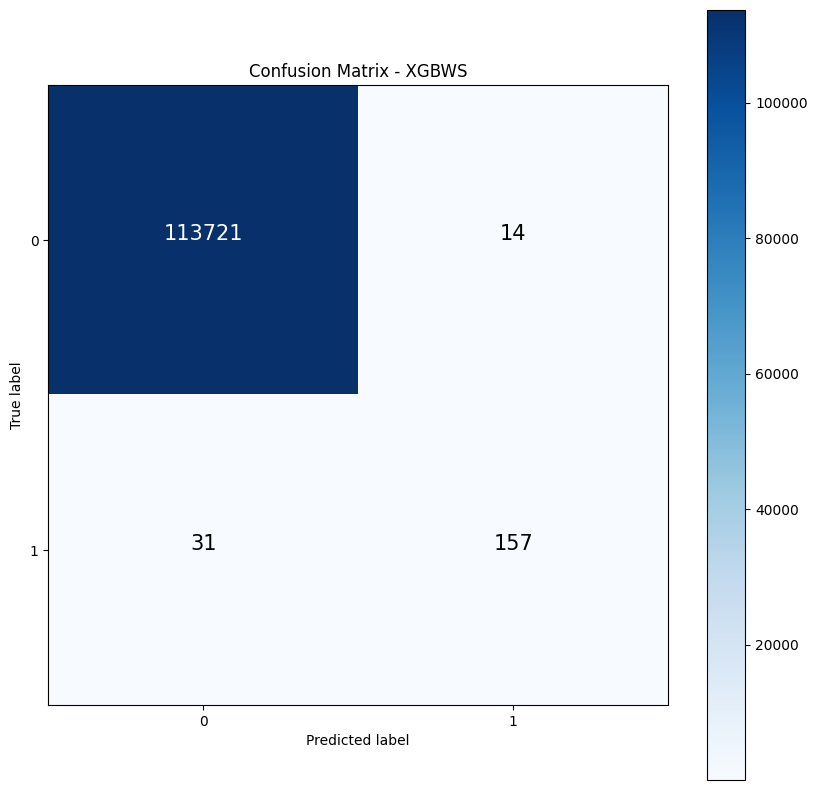

In [77]:
su.make_confusion_matrix(y_test, y_pred_ws_7, model_name="XGBWS", savefig=True)

#### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [78]:
res71 = su.calculate_results(y_test, y_pred_ws_7)
res71

{'accuracy': 99.96049963571886,
 'precision': np.float64(0.999592819887293),
 'recall': np.float64(0.9996049963571886),
 'f1': np.float64(0.9995956586624715),
 'mcc': np.float64(0.875439622660592)}

In [79]:
auc71 = roc_auc_score(y_test, y_pred_ws_7)
auc71

np.float64(0.917491644911791)

## 7.2 XGBoost classifier with synthetic data


In [80]:
model_s_7 = XGBClassifier()
model_s_7.fit(X_train_smote, y_train_smote)
y_pred_s_7 = model_s_7.predict(X_test)
acc_s_7 = accuracy_score(y_test, y_pred_s_7)
acc_s_7

0.999069546974711

### Confusion Mtrix


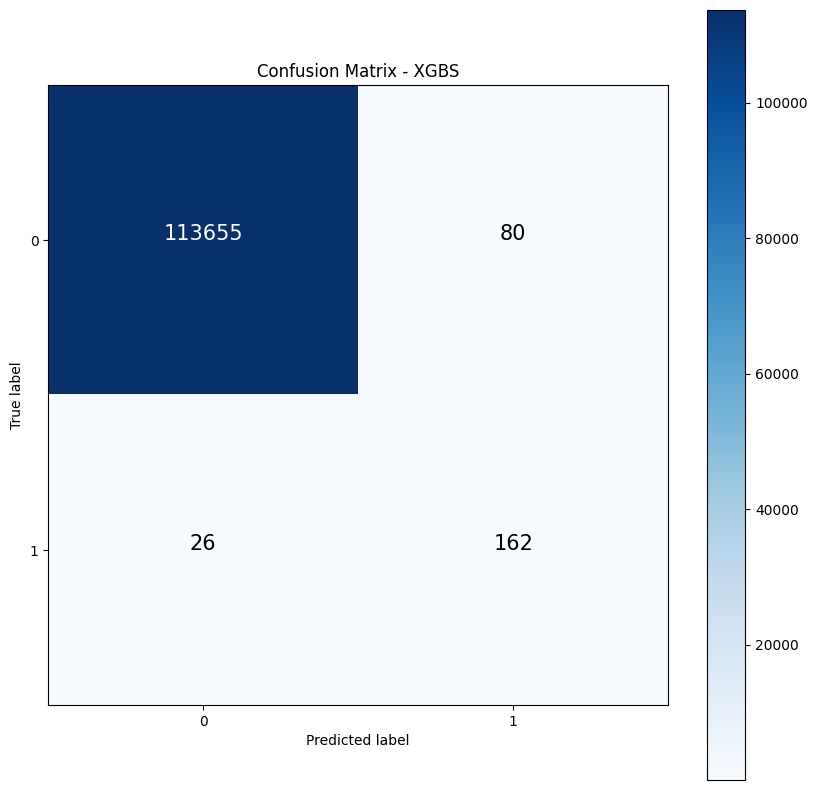

In [81]:
su.make_confusion_matrix(y_test, y_pred_s_7, model_name="XGBS", savefig=True)

#### `Accuracy`, `f1Score`, `precision`, `mcc` and `recall` of the model


In [82]:
res72 = su.calculate_results(y_test, y_pred_s_7)
res72

{'accuracy': 99.9069546974711,
 'precision': np.float64(0.9992261342250524),
 'recall': np.float64(0.999069546974711),
 'f1': np.float64(0.9991278603011419),
 'mcc': np.float64(0.7590613525862362)}

In [83]:
auc72 = roc_auc_score(y_test, y_pred_s_7)
auc72

np.float64(0.930499369100812)

# Comparative analysis of all the output models


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Create finalOP directory if it doesn't exist
os.makedirs("finalOP", exist_ok=True)

# Create the DataFrame
dp = pd.DataFrame([res11, res12, res21, res22, res31, res32, res41, res42, res51, res52, res61, res62, res71, res72],
                  index=['Linear Regression - No SMOTE', 'Linear Regression - SMOTE', 
                        'Decision Tree - No SMOTE', 'Decision Tree - SMOTE', 
                        'Naive Bayes Classifier - No SMOTE', 'Naive Bayes Classifier - SMOTE', 
                        'K Nearest Neighbours - No SMOTE', 'K Nearest Neighbours - SMOTE', 
                        'Random Forest Classifier - No SMOTE', 'Random Forest Classifier - SMOTE', 
                        'Support Vector Classifier - No SMOTE', 'Support Vector Classifier - SMOTE', 
                        'XGBoost - No SMOTE', 'XGBoost - SMOTE'])

# 1. Table of Results
print("Comparative Table:")
print(dp)

# 2. Bar Plots for Comparison
metrics = ['accuracy', 'precision', 'recall', 'f1', 'mcc']
num_models = len(dp) // 2
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    model_names = [dp.index[j] for j in range(i*2, i*2+2)]
    values = dp[metric].values.reshape(num_models, 2)
    x = np.arange(num_models)
    width = 0.35
    
    rects1 = axes[i].bar(x - width/2, values[:, 0], width, label='No SMOTE')
    rects2 = axes[i].bar(x + width/2, values[:, 1], width, label='SMOTE')
    axes[i].set_ylabel(metric)
    axes[i].set_title(metric + ' Comparison')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels([f"Model {j+1}" for j in range(num_models)])
    axes[i].legend()
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            axes[i].annotate('{}'.format(height.round(2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    autolabel(rects2)

fig.tight_layout()
plt.savefig('finalOP/metrics_comparison_barplots.png', bbox_inches='tight', dpi=300)
plt.close()

# 3. Box Plots for Distribution Comparison
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dp.index, y=dp[metric])
    plt.title(f"{metric} Distribution Comparison")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'finalOP/{metric}_distribution_boxplot.png', bbox_inches='tight', dpi=300)
    plt.close()

# 4. Save the comparison table as CSV
dp.to_csv('finalOP/model_comparison_results.csv')

Comparative Table:
                                       accuracy  precision    recall  \
Linear Regression - No SMOTE          99.922755   0.999167  0.999228   
Linear Regression - SMOTE             96.813637   0.998270  0.968136   
Decision Tree - No SMOTE              99.951722   0.999498  0.999517   
Decision Tree - SMOTE                 95.417080   0.998236  0.954171   
Naive Bayes Classifier - No SMOTE     97.763402   0.998207  0.977634   
Naive Bayes Classifier - SMOTE        97.386831   0.998258  0.973868   
K Nearest Neighbours - No SMOTE       99.964889   0.999638  0.999649   
K Nearest Neighbours - SMOTE          99.828832   0.998973  0.998288   
Random Forest Classifier - No SMOTE   99.956988   0.999554  0.999570   
Random Forest Classifier - SMOTE      99.355705   0.998487  0.993557   
Support Vector Classifier - No SMOTE  99.946455   0.999443  0.999465   
Support Vector Classifier - SMOTE     98.361174   0.998242  0.983612   
XGBoost - No SMOTE                    99.9605

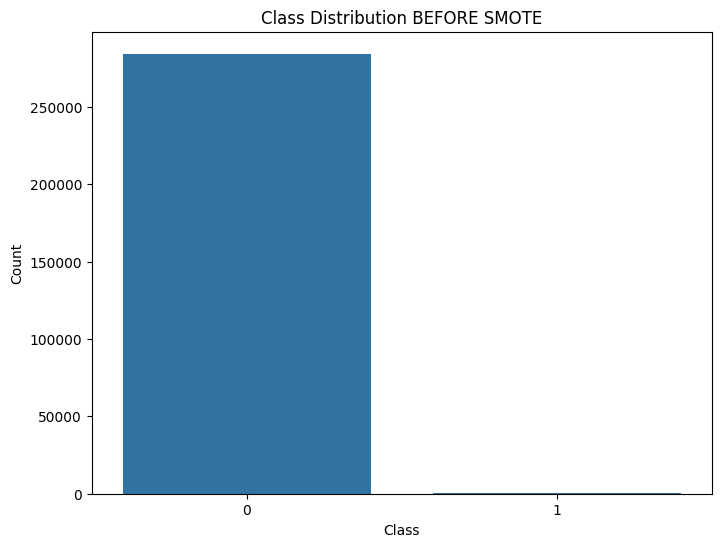

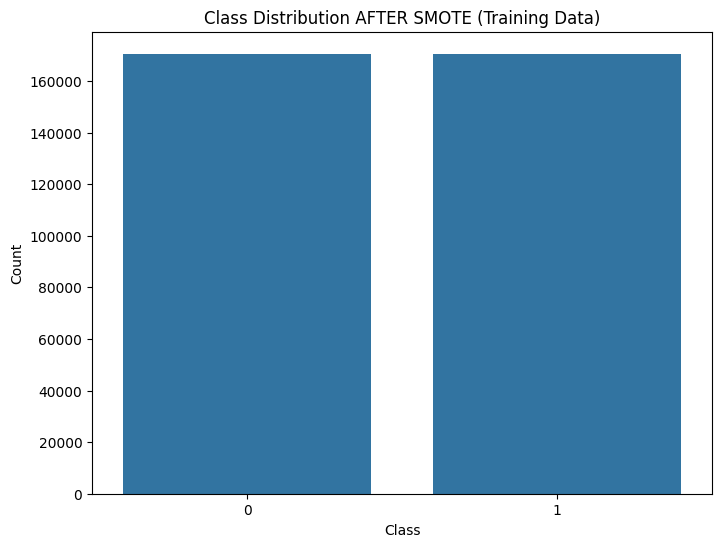

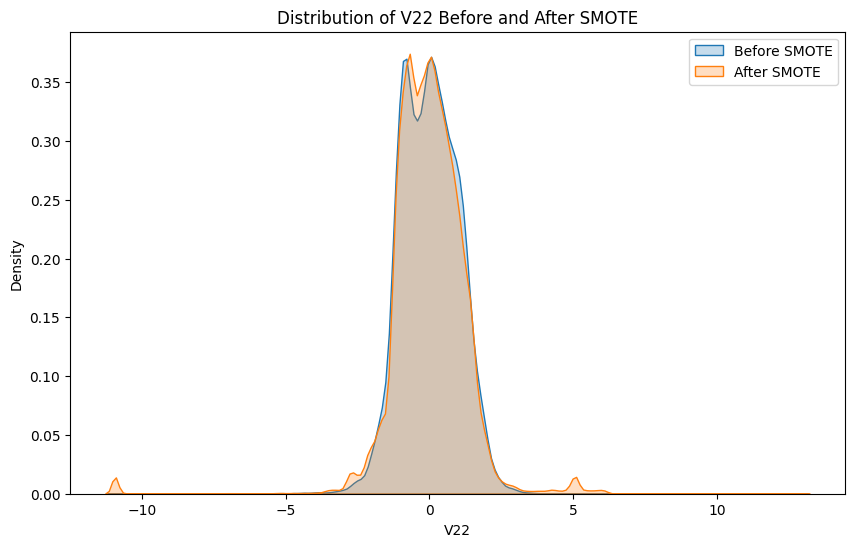

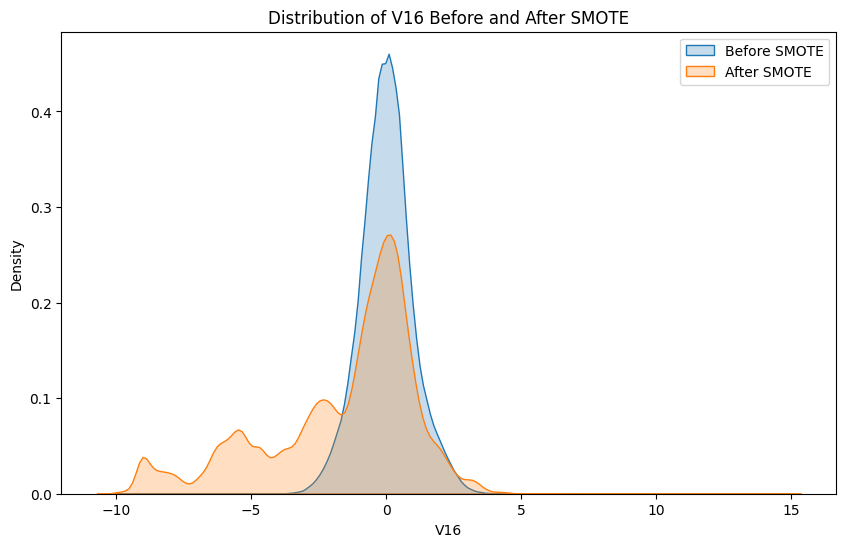

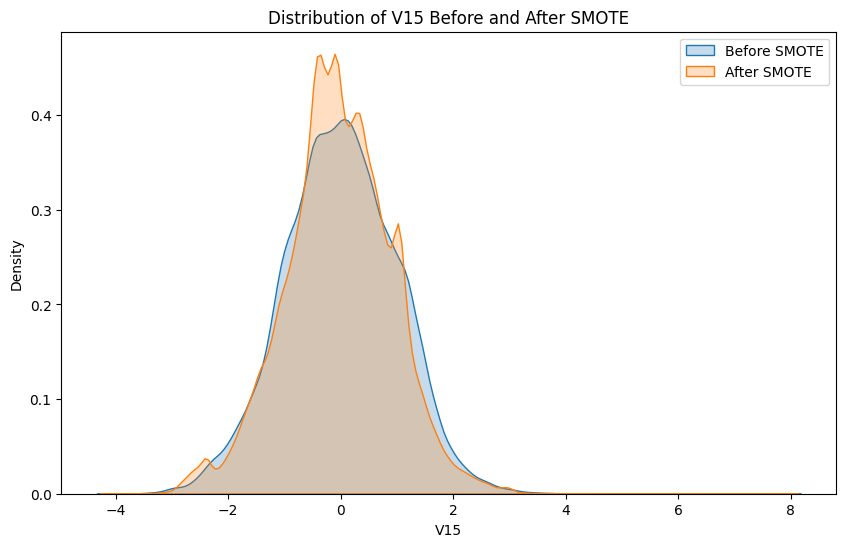

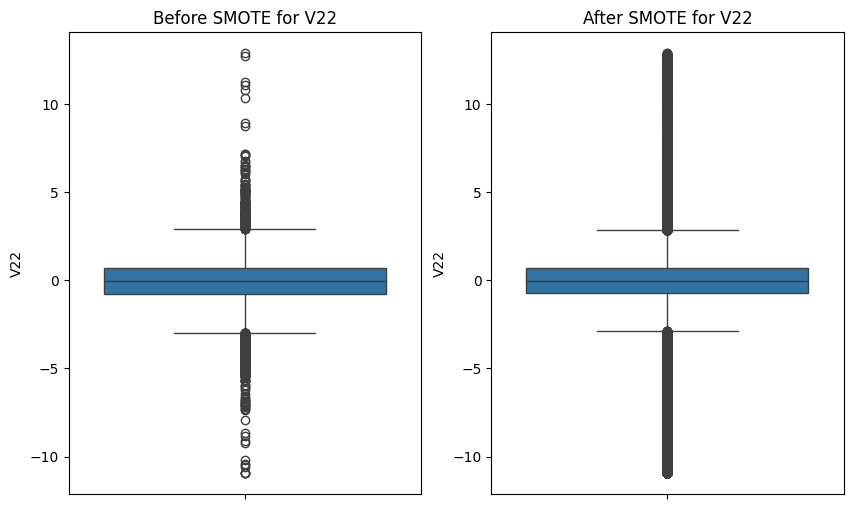

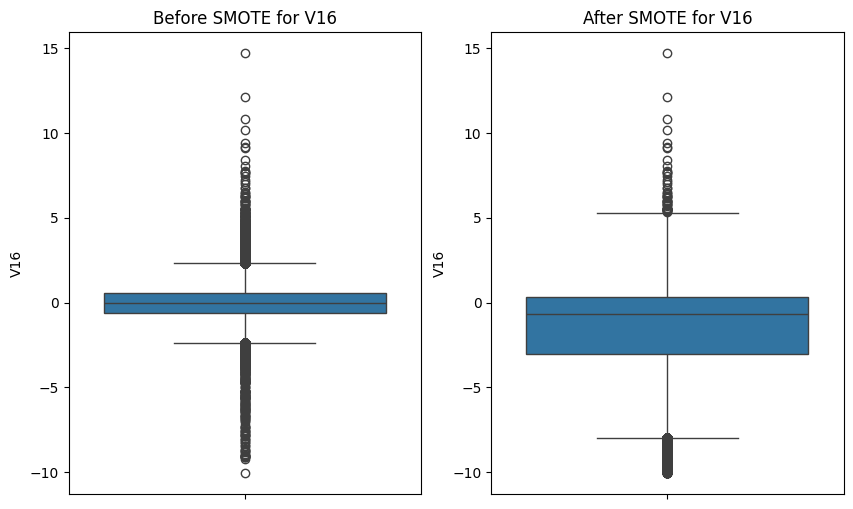

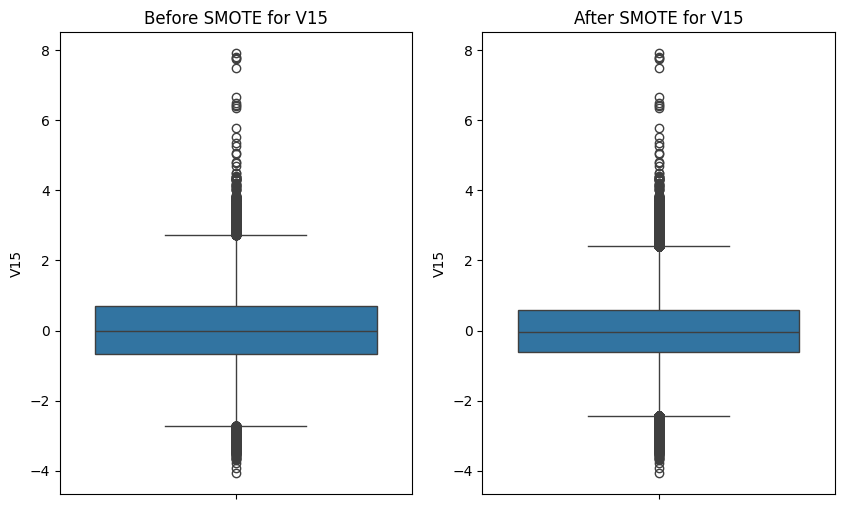

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# ... (Your data loading, cleaning, and train/test split code) ...

# Create the "finalOP" folder if it doesn't exist

# 1. Class Distribution BEFORE SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Class Distribution BEFORE SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig("finalOP/class_distribution_before.png")  # Save figure
plt.show()

# 2. Apply SMOTE (only to training data!)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Class Distribution AFTER SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote)
plt.title("Class Distribution AFTER SMOTE (Training Data)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.savefig("finalOP/class_distribution_after.png")  # Save figure
plt.show()

# 4. Feature Distribution Comparison
features_to_visualize = ['V22', 'V16', 'V15']  # Replace with your feature names

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(X_train[feature], label="Before SMOTE", fill=True)
    sns.kdeplot(X_train_smote[feature], label="After SMOTE", fill=True)
    plt.title(f"Distribution of {feature} Before and After SMOTE")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.savefig(f"finalOP/feature_distribution_{feature}.png")  # Save figure
    plt.show()

# 5. Box plots for feature comparison
for feature in features_to_visualize:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.boxplot(y = X_train[feature])
    plt.title(f"Before SMOTE for {feature}")
    plt.subplot(1,2,2)
    sns.boxplot(y = X_train_smote[feature])
    plt.title(f"After SMOTE for {feature}")
    plt.savefig(f"finalOP/box_plot_{feature}.png")  # Save figure
    plt.show()


# # 6. t-SNE or UMAP visualization
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)

# X_train_reduced_before = tsne.fit_transform(X_train)
# X_train_reduced_after = tsne.fit_transform(X_train_smote)

# plt.figure(figsize=(10, 8))
# plt.scatter(X_train_reduced_before[:, 0], X_train_reduced_before[:, 1], c=y_train, label="Before SMOTE", alpha=0.5)
# plt.scatter(X_train_reduced_after[:, 0], X_train_reduced_after[:, 1], c=y_train_smote, label="After SMOTE", alpha=0.5, marker='x')
# plt.title("t-SNE Visualization of Data Before and After SMOTE")
# plt.legend()
# plt.savefig(os.path.join(output_folder, "tsne_visualization.png"))  # Save figure
# plt.show()

# # ... (Your model training and evaluation code) ...

# TODO: SELECT MODELS FROM THE ABOVE MODELS AND GET THE BEST ONES TO MAKE AN ENSMBLE LEARNER THEN USE ADA BOOST


# Creating an ensemble learner


In [87]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import recall_score, make_scorer, precision_score, f1_score, confusion_matrix, classification_report
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Function for model training (as before)
# def train_model(model, param_grid, X_train, y_train):
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('clf', model)
#     ])

#     recall_scorer = make_scorer(recall_score)
#     grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=recall_scorer, n_jobs=-1, verbose=1)
#     grid_search.fit(X_train, y_train)
#     return grid_search.best_estimator_

# # Example hyperparameter grids (adjust these)
# lr_param_grid = {'clf__C': [0.1, 1, 10], 'clf__penalty': ['l1', 'l2']}
# rf_param_grid = {'clf__n_estimators': [50, 100, 200], 'clf__max_depth': [None, 10, 20]}
# xgb_param_grid = {'clf__n_estimators': [50, 100], 'clf__max_depth': [3, 5, 7]}

# lr_model = train_model(LogisticRegression(solver='liblinear', random_state=42), lr_param_grid, X_train, y_train)
# rf_model = train_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train)
# xgb_model = train_model(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, X_train, y_train)


# # 2. Create Ensemble (Weighted Averaging)

# estimators = [
#     ('lr', lr_model),
#     ('rf', rf_model),
#     ('xgb', xgb_model)
# ]

# # Weights (based on recall - you'll need to calculate these)
# lr_recall = recall_score(y_test, lr_model.predict(X_test))
# rf_recall = recall_score(y_test, rf_model.predict(X_test))
# xgb_recall = recall_score(y_test, xgb_model.predict(X_test))

# total_recall = lr_recall + rf_recall + xgb_recall
# weights = [lr_recall/total_recall, rf_recall/total_recall, xgb_recall/total_recall]

# ensemble = VotingClassifier(estimators=estimators, voting='soft', weights=weights)
# ensemble.fit(X_train, y_train)

# # 3. Threshold Tuning (for maximizing TPs/Recall)
# y_prob_ensemble = ensemble.predict_proba(X_test)[:, 1]

# best_threshold = 0.5
# best_recall = 0

# thresholds = np.linspace(0.1, 0.9, 20)
# for threshold in thresholds:
#     y_pred_threshold = (y_prob_ensemble > threshold).astype(int)
#     recall = recall_score(y_test, y_pred_threshold)
#     if recall > best_recall:
#         best_recall = recall
#         best_threshold = threshold

# print(f"Best Threshold: {best_threshold}")
# y_pred_final = (y_prob_ensemble > best_threshold).astype(int)

# # 4. Evaluate and Compare

# def evaluate_model(model, X_test, y_test, model_name):
#     y_pred = model.predict(X_test)
#     recall = recall_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     cm = confusion_matrix(y_test, y_pred)
#     cr = classification_report(y_test, y_pred)

#     print(f"\n{model_name} Evaluation:")
#     print(f"Recall: {recall}")
#     print(f"Precision: {precision}")
#     print(f"F1-score: {f1}")
#     print("Confusion Matrix:\n", cm)
#     print("Classification Report:\n", cr)
    
#     # Plot Confusion Matrix
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
#     plt.title(f"{model_name} Confusion Matrix")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("True Label")
#     plt.show()

#     return recall, precision, f1

# # Evaluate individual models and ensemble
# lr_recall, lr_precision, lr_f1 = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
# rf_recall, rf_precision, rf_f1 = evaluate_model(rf_model, X_test, y_test, "Random Forest")
# xgb_recall, xgb_precision, xgb_f1 = evaluate_model(xgb_model, X_test, y_test, "XGBoost")
# ensemble_recall, ensemble_precision, ensemble_f1 = evaluate_model(ensemble, X_test, y_test, "Ensemble")

# # Create a comparison table
# comparison_data = {
#     'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Ensemble'],
#     'Recall': [lr_recall, rf_recall, xgb_recall, ensemble_recall],
#     'Precision': [lr_precision, rf_precision, xgb_precision, ensemble_precision],
#     'F1-score': [lr_f1, rf_f1, xgb_f1, ensemble_f1]
# }

# comparison_df = pd.DataFrame(comparison_data)
# print("\nModel Comparison:")
# print(comparison_df)

# # Plot comparison (optional)
# comparison_df.plot(x='Model', y=['Recall', 'Precision', 'F1-score'], kind='bar', figsize=(10, 6))
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# ENSEMBLE LEARNER


In [88]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import pandas as pd
from sklearn.base import BaseEstimator, ClassifierMixin

## Define Individual Models


In [89]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
svm_model = SVC(probability=True, random_state=42)

## Ensemble Learner (Stacking & Voting Classifier)


In [90]:
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model)
]

In [91]:
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "SVM": svm_model
}

In [92]:
def get_probabilities(model, X):
    """
    Safely get probability predictions if available, otherwise return None
    """
    try:
        if hasattr(model, "predict_proba"):
            return model.predict_proba(X)[:, 1]
        return None
    except AttributeError:
        return None

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

def evaluate_single_models(models, X_train, X_test, y_train, y_test):
    """
    Train and evaluate individual models.
    Returns trained models and performance results.
    """
    trained_models = {}
    metrics_list = []

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)  # Train model

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        metrics = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
            "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        }

        metrics_list.append(metrics)
        trained_models[name] = model  # Store trained model

    return trained_models, pd.DataFrame(metrics_list)


In [96]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier

def add_ensemble_models(trained_models, X_train, X_test, y_train, y_test):
    """
    Train and evaluate ensemble models.
    Returns trained ensemble models and performance results.
    """
    estimators = [(name, trained_models[name]) for name in trained_models]  # Use trained models

    ensemble_models = {
        "Hard Voting": VotingClassifier(estimators=estimators, voting='hard'),
        "Soft Voting": VotingClassifier(estimators=estimators, voting='soft'),
        "Stacking Classifier": StackingClassifier(
            estimators=estimators, 
            final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
            cv=5
        )
    }

    trained_ensemble_models = {}
    metrics_list = []

    for name, model in ensemble_models.items():
        try:
            print(f"Training {name}...")
            model.fit(X_train, y_train)  # Train model

            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            metrics = {
                "Model": name,
                "Accuracy": accuracy_score(y_test, y_pred),
                "Precision": precision_score(y_test, y_pred),
                "Recall": recall_score(y_test, y_pred),
                "F1-Score": f1_score(y_test, y_pred),
                "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
                "AUC-ROC": roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
            }

            metrics_list.append(metrics)
            trained_ensemble_models[name] = model  # Store trained model

        except Exception as e:
            print(f"Error training {name}: {str(e)}")
            continue

    return trained_ensemble_models, pd.DataFrame(metrics_list)


In [97]:
# # Usage example:
# # First evaluate individual models
# results_df = evaluate_single_models(models, X_train, X_test, y_train, y_test)
# print("Individual Models Results:")
# print(results_df)

In [98]:
# # Then try ensemble models
# ensemble_results = add_ensemble_models(models, X_train, X_test, y_train, y_test)
# print("\nEnsemble Models Results:")
# print(ensemble_results)

In [99]:
# Train individual models and store results
trained_models, results_df = evaluate_single_models(models, X_train, X_test, y_train, y_test)
print("Individual Models Results:")
print(results_df)

# Train ensemble models using the trained base models
trained_ensemble_models, ensemble_results = add_ensemble_models(trained_models, X_train, X_test, y_train, y_test)
print("\nEnsemble Models Results:")
print(ensemble_results)

# Combine trained models for evaluation
all_trained_models = {**trained_models, **trained_ensemble_models}



Training Random Forest...
Training XGBoost...
Training SVM...
Individual Models Results:
           Model  Accuracy  Precision    Recall  F1-Score  Balanced Accuracy  \
0  Random Forest  0.999623   0.939394  0.824468  0.878187           0.912190   
1        XGBoost  0.999605   0.918129  0.835106  0.874652           0.917492   
2            SVM  0.999465   0.944056  0.718085  0.815710           0.859007   

    AUC-ROC  
0  0.961408  
1  0.983872  
2  0.974396  
Training Hard Voting...
Training Soft Voting...
Training Stacking Classifier...

Ensemble Models Results:
                 Model  Accuracy  Precision    Recall  F1-Score  \
0          Hard Voting  0.999631   0.939759  0.829787  0.881356   
1          Soft Voting  0.999658   0.946108  0.840426  0.890141   
2  Stacking Classifier  0.999623   0.944785  0.819149  0.877493   

   Balanced Accuracy   AUC-ROC  
0           0.914850       N/A  
1           0.920173  0.979579  
2           0.909535  0.932192  


# Plotting the outputs


## 1. Import Required Libraries


In [100]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Create a directory to save outputs if it doesn't exist
output_dir = "finalOP"
os.makedirs(output_dir, exist_ok=True)


## 2. Function to Plot & Save Confusion Matrices


In [101]:
def plot_confusion_matrix(model, model_name, X_test, y_test):
    """
    Plots and saves the confusion matrix for a given trained model.
    """
    try:
        y_pred = model.predict(X_test)  # Ensure model is trained
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - {model_name}")

        filename = os.path.join(output_dir, f"confusion_matrix_{model_name.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300)
        plt.close()
        print(f"Saved: {filename}")

    except Exception as e:
        print(f"Error plotting confusion matrix for {model_name}: {str(e)}")

## 3. Function to Plot & Save AUC-ROC Curve


In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_auc_roc(models, X_test, y_test):
    """
    Plots and saves the AUC-ROC Curve for trained models that support probability predictions.
    """
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        try:
            if hasattr(model, "predict_proba"):  # Ensure model supports probability predictions
                y_prob = model.predict_proba(X_test)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                auc = roc_auc_score(y_test, y_prob)
                plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

        except Exception as e:
            print(f"Skipping AUC-ROC for {name}: {str(e)}")

    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend()

    filename = os.path.join(output_dir, "auc_roc_curve.png")
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved: {filename}")


## 4. Function to Plot & Save Precision-Recall Curve


In [103]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall(models, X_test, y_test):
    """
    Plots and saves the Precision-Recall Curve for trained models that support probability predictions.
    """
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        try:
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_test)[:, 1]
                precision, recall, _ = precision_recall_curve(y_test, y_prob)
                plt.plot(recall, precision, label=f"{name}")

        except Exception as e:
            print(f"Skipping Precision-Recall for {name}: {str(e)}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    filename = os.path.join(output_dir, "precision_recall_curve.png")
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved: {filename}")


## 5. Function to Plot & Save Feature Importance (For XGBoost)


In [104]:
def plot_feature_importance(model, feature_names):
    """
    Plots and saves the feature importance for XGBoost if applicable.
    """
    try:
        if hasattr(model, "feature_importances_"):
            feature_importance = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)

            plt.figure(figsize=(10, 6))
            sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
            plt.xlabel("Feature Importance Score")
            plt.ylabel("Features")
            plt.title("Feature Importance - XGBoost")

            filename = os.path.join(output_dir, "feature_importance.png")
            plt.savefig(filename, dpi=300)
            plt.close()
            print(f"Saved: {filename}")

    except Exception as e:
        print(f"Skipping feature importance plot: {str(e)}")


## 6. Run All Graphs


In [105]:
# Combine all trained models (individual + ensemble)
# all_trained_models = {**trained_models, **trained_ensemble_models}

# Generate Confusion Matrices
for name, model in all_trained_models.items():
    plot_confusion_matrix(model, name, X_test, y_test)

# Generate AUC-ROC Curve
plot_auc_roc(all_trained_models, X_test, y_test)

# Generate Precision-Recall Curve
plot_precision_recall(all_trained_models, X_test, y_test)

# Generate Feature Importance (Only for XGBoost)
plot_feature_importance(trained_models["XGBoost"], X.columns)


Saved: finalOP/confusion_matrix_Random_Forest.png
Saved: finalOP/confusion_matrix_XGBoost.png
Saved: finalOP/confusion_matrix_SVM.png
Saved: finalOP/confusion_matrix_Hard_Voting.png
Saved: finalOP/confusion_matrix_Soft_Voting.png
Saved: finalOP/confusion_matrix_Stacking_Classifier.png
Saved: finalOP/auc_roc_curve.png
Saved: finalOP/precision_recall_curve.png
Saved: finalOP/feature_importance.png


/var/folders/yv/zbz545cd3rqdyvr6p5h_xqbw0000gn/T/ipykernel_1075/2161490386.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


In [106]:

# # Run visualization functions
# for name, model in all_trained_models.items():
#     plot_confusion_matrix(model, name, X_test, y_test)

# plot_auc_roc(all_trained_models, X_test, y_test)
# plot_precision_recall(all_trained_models, X_test, y_test)

# # Plot feature importance if XGBoost is used
# if "XGBoost" in trained_models:
#     plot_feature_importance(trained_models["XGBoost"], X.columns)

In [107]:
# soft_voting_clf = VotingClassifier(
#     estimators=estimators,
#     voting='soft'
# )

## False Positive vs False Negative


In [108]:
import numpy as np

def plot_false_positive_vs_false_negative(models, X_test, y_test):
    """
    Plots and saves the False Positives vs. False Negatives tradeoff.
    """
    plt.figure(figsize=(8, 6))
    
    for name, model in models.items():
        try:
            y_pred = model.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = cm.ravel()

            plt.bar(name, fp, color='red', label="False Positives" if name == list(models.keys())[0] else "")
            plt.bar(name, fn, color='blue', bottom=fp, label="False Negatives" if name == list(models.keys())[0] else "")

        except Exception as e:
            print(f"Skipping False Positive vs. False Negative for {name}: {str(e)}")

    plt.ylabel("Count")
    plt.title("False Positives vs. False Negatives")
    plt.xticks(rotation=45)
    plt.legend()
    
    filename = os.path.join(output_dir, "false_positive_vs_false_negative.png")
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved: {filename}")

# Call the function after training
plot_false_positive_vs_false_negative(all_trained_models, X_test, y_test)


Saved: finalOP/false_positive_vs_false_negative.png


## Model Performance Comparison (Bar Chart)


In [109]:
def plot_model_performance(results_df):
    """
    Plots and saves the comparison of Accuracy, Precision, Recall, and F1-Score across models.
    """
    metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
    results_df.set_index("Model", inplace=True)
    
    results_df[metrics].plot(kind='bar', figsize=(10, 6), colormap='viridis')
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend()
    
    filename = os.path.join(output_dir, "model_performance_comparison.png")
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved: {filename}")

# Call after training
plot_model_performance(pd.concat([results_df, ensemble_results]))


Saved: finalOP/model_performance_comparison.png
